# 서울교통공사_노인 승하차 정보.csv

# EDA 진행

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 파일 불러오기
data = pd.read_csv('서울교통공사_노인 승하차 정보.csv', encoding = 'cp949')
data

,연번,호선,고유역번호(외부역코드),역명,승하차구분,수송연월,승하차인원수
0,1,1,150,서울역,승차,Jan-22,118173
1,2,1,150,서울역,하차,Jan-22,111415
2,3,1,151,시청,승차,Jan-22,47686
3,4,1,151,시청,하차,Jan-22,46713
4,5,1,152,종각,승차,Jan-22,87092
...,...,...,...,...,...,...,...
4347,4348,8,2826,수진,하차,Aug-22,35429
4348,4349,8,2827,모란,승차,Aug-22,42817
4349,4350,8,2827,모란,하차,Aug-22,33684
4350,4351,8,2828,남위례,승차,Aug-22,20016


## 1. 데이터 기본 정보 확인

1) 데이터 첫 5행 확인

In [3]:
data.head()

,연번,호선,고유역번호(외부역코드),역명,승하차구분,수송연월,승하차인원수
0,1,1,150,서울역,승차,Jan-22,118173
1,2,1,150,서울역,하차,Jan-22,111415
2,3,1,151,시청,승차,Jan-22,47686
3,4,1,151,시청,하차,Jan-22,46713
4,5,1,152,종각,승차,Jan-22,87092


2) 데이터 정보 확인

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   연번            4352 non-null   int64 
 1   호선            4352 non-null   int64 
 2   고유역번호(외부역코드)  4352 non-null   int64 
 3   역명            4352 non-null   object
 4   승하차구분         4352 non-null   object
 5   수송연월          4352 non-null   object
 6   승하차인원수        4352 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 238.1+ KB


3) 데이터 요약

In [5]:
data.describe()

,연번,호선,고유역번호(외부역코드),승하차인원수
count,4352.000000,4352.000000,4352.000000,4352.000000
mean,2176.500000,4.606618,1615.665441,57436.311351
std,1256.458515,2.004736,1172.964750,39549.073995
min,1.000000,1.000000,150.000000,3956.000000
25%,1088.750000,3.000000,316.750000,30850.750000
50%,2176.500000,5.000000,2527.500000,48551.500000
75%,3264.250000,6.000000,2640.250000,70418.500000
max,4352.000000,8.000000,2828.000000,269569.000000


4) 데이터 뒤 5행 확인

In [6]:
data.tail()

,연번,호선,고유역번호(외부역코드),역명,승하차구분,수송연월,승하차인원수
4347,4348,8,2826,수진,하차,Aug-22,35429
4348,4349,8,2827,모란,승차,Aug-22,42817
4349,4350,8,2827,모란,하차,Aug-22,33684
4350,4351,8,2828,남위례,승차,Aug-22,20016
4351,4352,8,2828,남위례,하차,Aug-22,20257


5) 결측치 확인

In [7]:
data.isna()

,연번,호선,고유역번호(외부역코드),역명,승하차구분,수송연월,승하차인원수
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4347,False,False,False,False,False,False,False
4348,False,False,False,False,False,False,False
4349,False,False,False,False,False,False,False
4350,False,False,False,False,False,False,False


5-1) 결측치 재확인

In [8]:
data.isna().sum()

연번              0
호선              0
고유역번호(외부역코드)    0
역명              0
승하차구분           0
수송연월            0
승하차인원수          0
dtype: int64

- 결측치 없다! 는 결론 내릴 수 있다
- 결측치 있다면 처리 및 대체 중요

6) 불필요한 열 제거 : 연변, 수송연월

In [9]:
data.drop('연번', axis=1, inplace=True)
data

,호선,고유역번호(외부역코드),역명,승하차구분,수송연월,승하차인원수
0,1,150,서울역,승차,Jan-22,118173
1,1,150,서울역,하차,Jan-22,111415
2,1,151,시청,승차,Jan-22,47686
3,1,151,시청,하차,Jan-22,46713
4,1,152,종각,승차,Jan-22,87092
...,...,...,...,...,...,...
4347,8,2826,수진,하차,Aug-22,35429
4348,8,2827,모란,승차,Aug-22,42817
4349,8,2827,모란,하차,Aug-22,33684
4350,8,2828,남위례,승차,Aug-22,20016


In [10]:
data.drop('수송연월', axis=1, inplace=True)
data

,호선,고유역번호(외부역코드),역명,승하차구분,승하차인원수
0,1,150,서울역,승차,118173
1,1,150,서울역,하차,111415
2,1,151,시청,승차,47686
3,1,151,시청,하차,46713
4,1,152,종각,승차,87092
...,...,...,...,...,...
4347,8,2826,수진,하차,35429
4348,8,2827,모란,승차,42817
4349,8,2827,모란,하차,33684
4350,8,2828,남위례,승차,20016


- 최종으로 이 데이터로 진행

<AxesSubplot:>

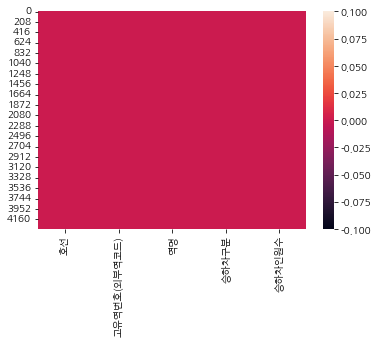

In [21]:
sns.heatmap(data.isnull())

## *결측치 처리 및 확인 참고)   
- 머신러닝은 인간이 정리해준 수많은 데이터를 학습하기 때문에 학습시 사용하는 데이터가 얼마나 잘 가공되어있느냐에 따라 성능의 차이가 천차만별   

- 데이터가 아무리 많이 수집되어있더라도 똑같은 데이터를 입력하면 동일한 결과가 나올 수 밖에 없다   

- 데이터 전처리과정에서 해야할 일은 어떤 데이터를 사용하느냐,어떤 모델을 사용할 것이냐에 따라 다양   

- 이미지일 수도 있고, 텍스트일 수도 있고, 수치형 데이터일 수도 있다!

![결측치](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F6wjsD%2FbtrtTMd5IFp%2FnK01mQtkD2qLOTpR2KeHk1%2Fimg.png)

### 1. 결측치 처리란? 
- 결측치라고 하는 것은 '데이터가 없다'는 것

- 일반적인 프로그래밍을 작성할 때 null 값을 참조하게 되면 프로그램이 곧장 죽어버리는 것처럼 데이터에 결측치가 존재한다면 학습이 진행되지 않는다.

- 그래서 결측치 처리는 데이터 종류와 상관없이 필수적으로 해주어야하는 데이터 전처리 과정 중 하나!

### 2. WHy 결측치 발생?
- 여러가지 이유가 있겠지만 수집이 제대로 안되서 발생할 가능성이 많다
    설문조사를 통해서 데이터를 수집했는데 몇 가지 항목이 비어있는채로 수집이 되었다던가, 관리하는 과정 중에서 누락된 경우
- 원인은 알 수 없지만 결론적으로 머신러닝을 하기 위해서는 이런 비어있는 값을 없애주던지 채워주던지 해야한다
- 결측치 처리를 할 때, "왜 결측치가 발생했을까?"를 판단하는 과정은 굉장히 의미가 있다
    무작정 특정 값으로 채우는 것이 아니라 의미있는 값으로 변환하여 채워줄 수 있으니까요. 

- 해당 비즈니스 도메인을 잘 알고 있거나, 데이터 수집 절차에 대해서 잘 알고 있는 사람이라면, '이건 의도적으로 비워둔 값이었으니까, 어떤 값으로 대체해서 처리하는 것이 좋겠군' 이런 판단을 할 수 있겠다

### 3. 결측치 처리
- 결측치는 없애야합니다. 
    - 즉 결측치가 있는 항목을 1)제거 하거나 2) 채워주는 작업 필요
    - 머신러닝에 있어서 데이터는 큰 자산이기 때문에 무조건 삭제하는 것은 좋지 X
    - BUT 결측치의 비율이 너무 많은 경우에는 오히려 엉뚱한 결과를 초래할 수 있으니 삭제
- 법칙으로 정해져있는 것은 아니지만 보통 결측치가 전체 데이터에 얼만큼 차지하는지 비율에 따라 처리 방법을 달리 한다
- 결측치는 삭제하거나 값을 치환해서 없애주어야한다!
- 결측치는 비율에 따라서 처리 방법을 달리한다!
    - 10% 미만이라면: row를 삭제하거나 치환한다.
    - 10~50% 사이라면: 모델을 만들어서 처리한다.
    - 50% 이상이라면: column을 삭제한다.

### 4. HOW 결측치 확인?
1. 데이터프레임의 info()라는 함수에서 출력하는 Non-Null Count 값이 데이터 전체 개수보다 적다면, 결측치가 존재한다
2. 데이터프레임의 isnull이라는 함수를 사용해서 확인
    - isnull()은 True 또는 False를 리턴하기 때문에 결측치가 없다면 모든 값이 False, 즉 0을 반환


### 5. 결측치 처리
- 결측치의 값을 특정 값으로 치환할 경우 : fillna()라는 함수를 사용해서 치환 가능
- 내장함수가 아닌 별도의 함수를 만들어서 적용해야할 경우 : apply
- 컬럼을 삭제할 경우 : drop()
- 만약 데이터 전처리를 PipeLine을 통해 일괄적으로 처리한다면, SimpeImputer 를 사용하여 일괄적으로 값을 처리할 수도 있다

In [12]:
data

,호선,고유역번호(외부역코드),역명,승하차구분,승하차인원수
0,1,150,서울역,승차,118173
1,1,150,서울역,하차,111415
2,1,151,시청,승차,47686
3,1,151,시청,하차,46713
4,1,152,종각,승차,87092
...,...,...,...,...,...
4347,8,2826,수진,하차,35429
4348,8,2827,모란,승차,42817
4349,8,2827,모란,하차,33684
4350,8,2828,남위례,승차,20016


## 2. 변수 간 상관 관계 분석

- 상관 관계 분석을 위해 숫자형 변수들을 사용
- 문자형 변수 쓰면 오류

#### 1) 역번호 와 승하차인원수 간 상관관계

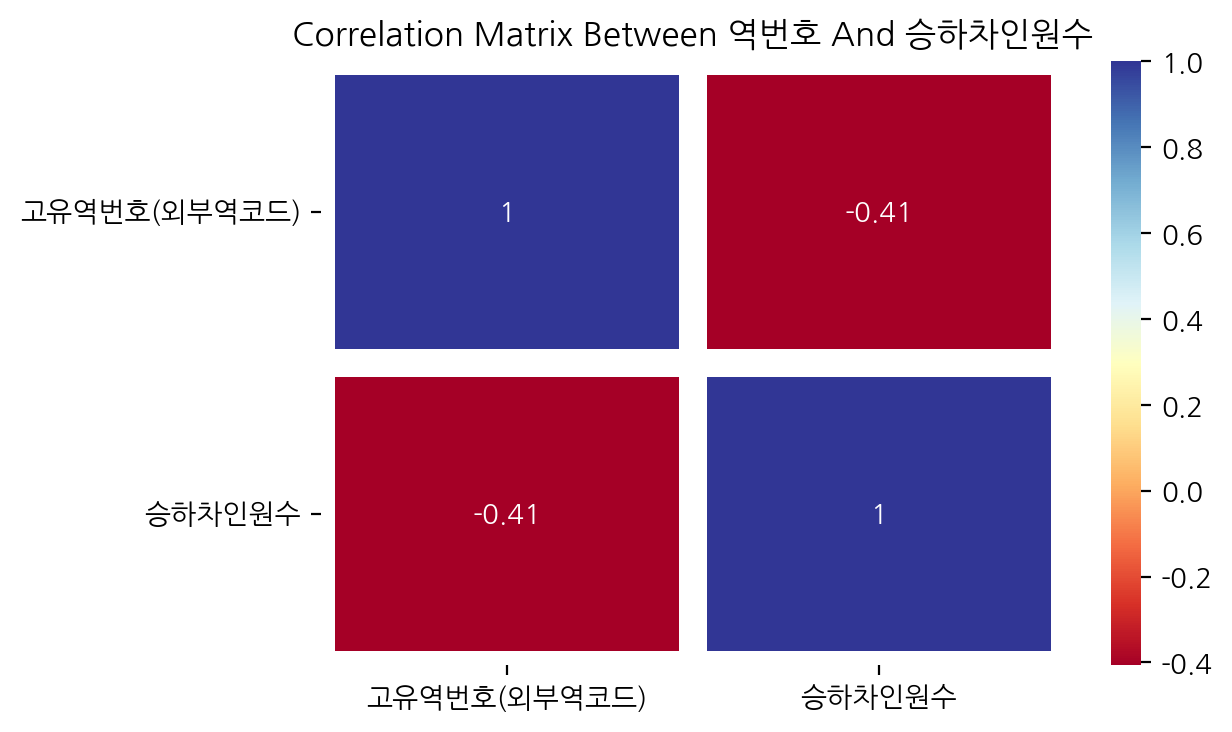

In [22]:
numeric_data = data[['고유역번호(외부역코드)', '승하차인원수']]  # 숫자형 변수

correlation = numeric_data.corr()

plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 안 깨지게

plt.figure(dpi=200)
sns.heatmap(correlation, annot=True, cmap='RdYlBu', linewidth=10,linecolor='white')

# 축 레이블 조정
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.title('Correlation Matrix Between 역번호 And 승하차인원수')
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

- -0.41의 상관관계는 두 변수 사이에 약한 음의 상관관계가 있다
- 이는 한 변수가 증가할 때 다른 변수는 약간 감소하는 경향이 있음을 의미할 수 있다.

#### 2) 호선 과 승하차인원수 간 상관관계

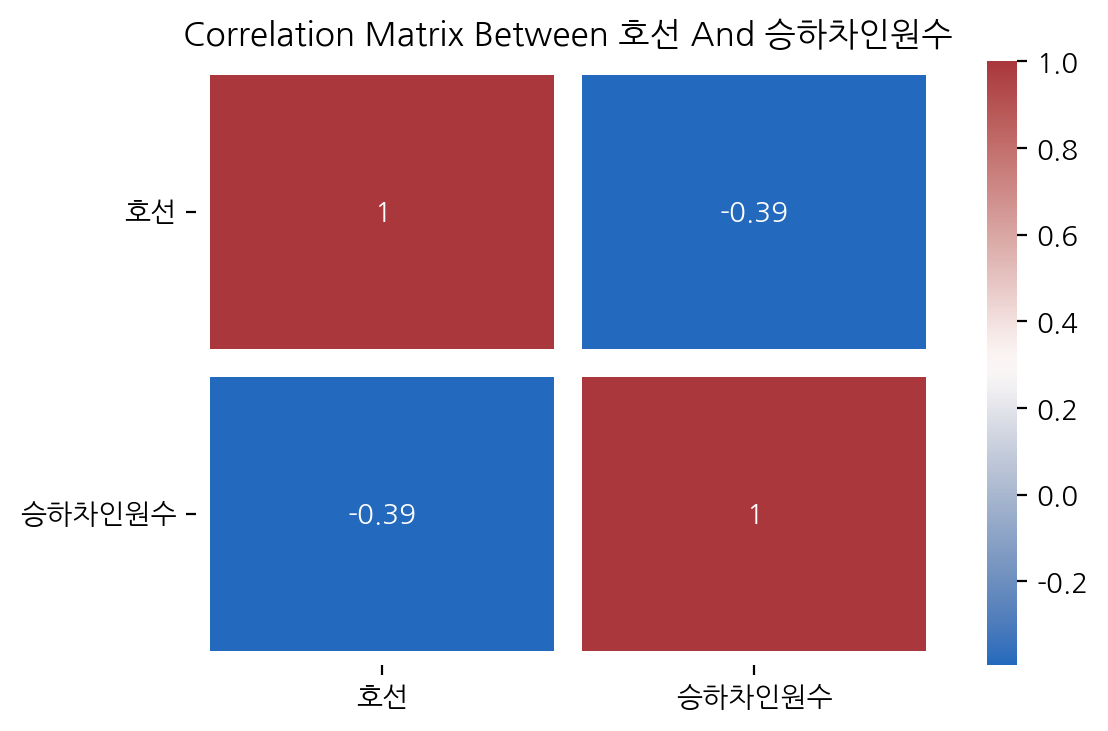

In [14]:
numeric_data = data[['호선', '승하차인원수']]  # 숫자형 변수

correlation = numeric_data.corr()

plt.rcParams['axes.unicode_minus'] = False

plt.figure(dpi=200)
sns.heatmap(correlation, annot=True, cmap='vlag', linewidth=10,linecolor='white')

# 축 레이블 조정
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.title('Correlation Matrix Between 호선 And 승하차인원수')
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

### 3) 호선-고유역번호-승하차인원수 간 상관관계

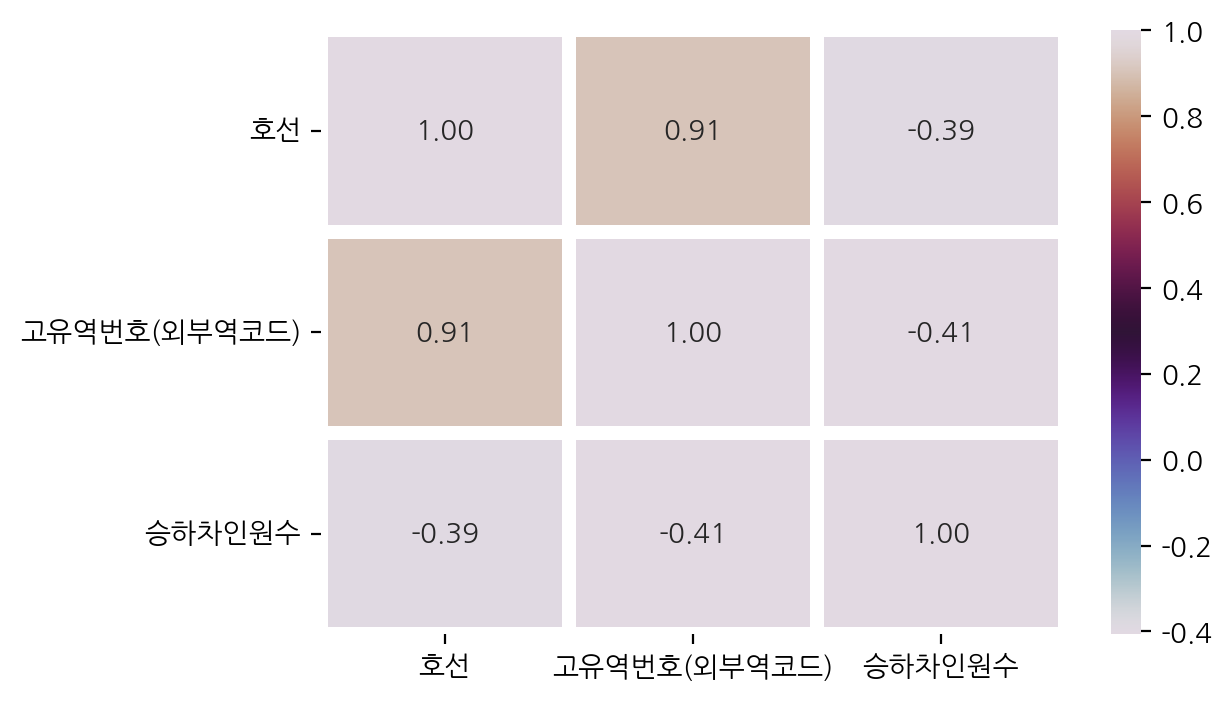

In [15]:
numeric_data = data[['호선','고유역번호(외부역코드)', '승하차인원수']]  # 숫자형 변수

plt.rcParams['axes.unicode_minus'] = False

plt.figure(dpi=200)
sns.heatmap(numeric_data.corr(), annot = True, cmap = 'twilight', linewidth = 5, fmt = '.2f');
plt.rcParams['font.family'] = 'NanumGothic'

<hr>

- 1) 연속형 데이터에 대해서만 상관관계 분석이 가능하다
    - 물론. 문자를 숫자로 변경하는 방법도 있습니다.

        One-hot Encoding 을 통해   인지/아닌지에 대해 각각의 벡터로 만들어서 표시할 수도 있고, 

        LabelEncoder 를 처럼 나오는 변수마다 1부터 숫자를 대입하여 변경하는 방법이 있습니다. 

        숫자로 변경할 경우 corr()  상관계수 계산이 가능해집니다. 

        하지만! 상관계수를 계산하여도 해석을 할 수 없습니다. 

- 2) -1에서 1의 값을 가진다. 

    상관계수 계산시 크기를 나누어주게 되어, 절대값이 1을 넘지 않는다

    보통 0.7보다 클 경우 강한 양의 상관관계가, 

    -0.7보다 작을 경우 강한 음의 상관관계(하나가 증가할 경우 다른 하나는 감소한다)가 있다고 판단

- 3) 상관관계가 인과관계를 의미하지는 않는다. 

    상관관계는 X와 Y 가 유사한 경향으로 증가하거나, 하나가 증가할때 다른 하나는 감소하는 경향이 있다.. 

    정도를 설명하는 것이지 X 때문에 Y 가 혹은 그 반대의 경우를 설명하는 것은 아닙니다. 

<hr>

## 3. 시각화

승차 하차 분별

In [16]:
data[data['승하차구분'] == '승차']

,호선,고유역번호(외부역코드),역명,승하차구분,승하차인원수
0,1,150,서울역,승차,118173
2,1,151,시청,승차,47686
4,1,152,종각,승차,87092
6,1,153,종로3가,승차,210706
8,1,154,종로5가,승차,184059
...,...,...,...,...,...
4342,8,2824,단대오거리,승차,54797
4344,8,2825,신흥,승차,28585
4346,8,2826,수진,승차,35936
4348,8,2827,모란,승차,42817


In [17]:
data[data['승하차구분'] == '하차']

,호선,고유역번호(외부역코드),역명,승하차구분,승하차인원수
1,1,150,서울역,하차,111415
3,1,151,시청,하차,46713
5,1,152,종각,하차,81694
7,1,153,종로3가,하차,195752
9,1,154,종로5가,하차,176738
...,...,...,...,...,...
4343,8,2824,단대오거리,하차,53593
4345,8,2825,신흥,하차,29891
4347,8,2826,수진,하차,35429
4349,8,2827,모란,하차,33684


In [18]:
up_count = (data['승하차구분'] == '승차').value_counts()
print(up_count)

승하차구분
True     2176
False    2176
Name: count, dtype: int64


# 수정 1) 호선별 승차/하차 분포 내림차순 정렬
아래에서는 1호선 진행

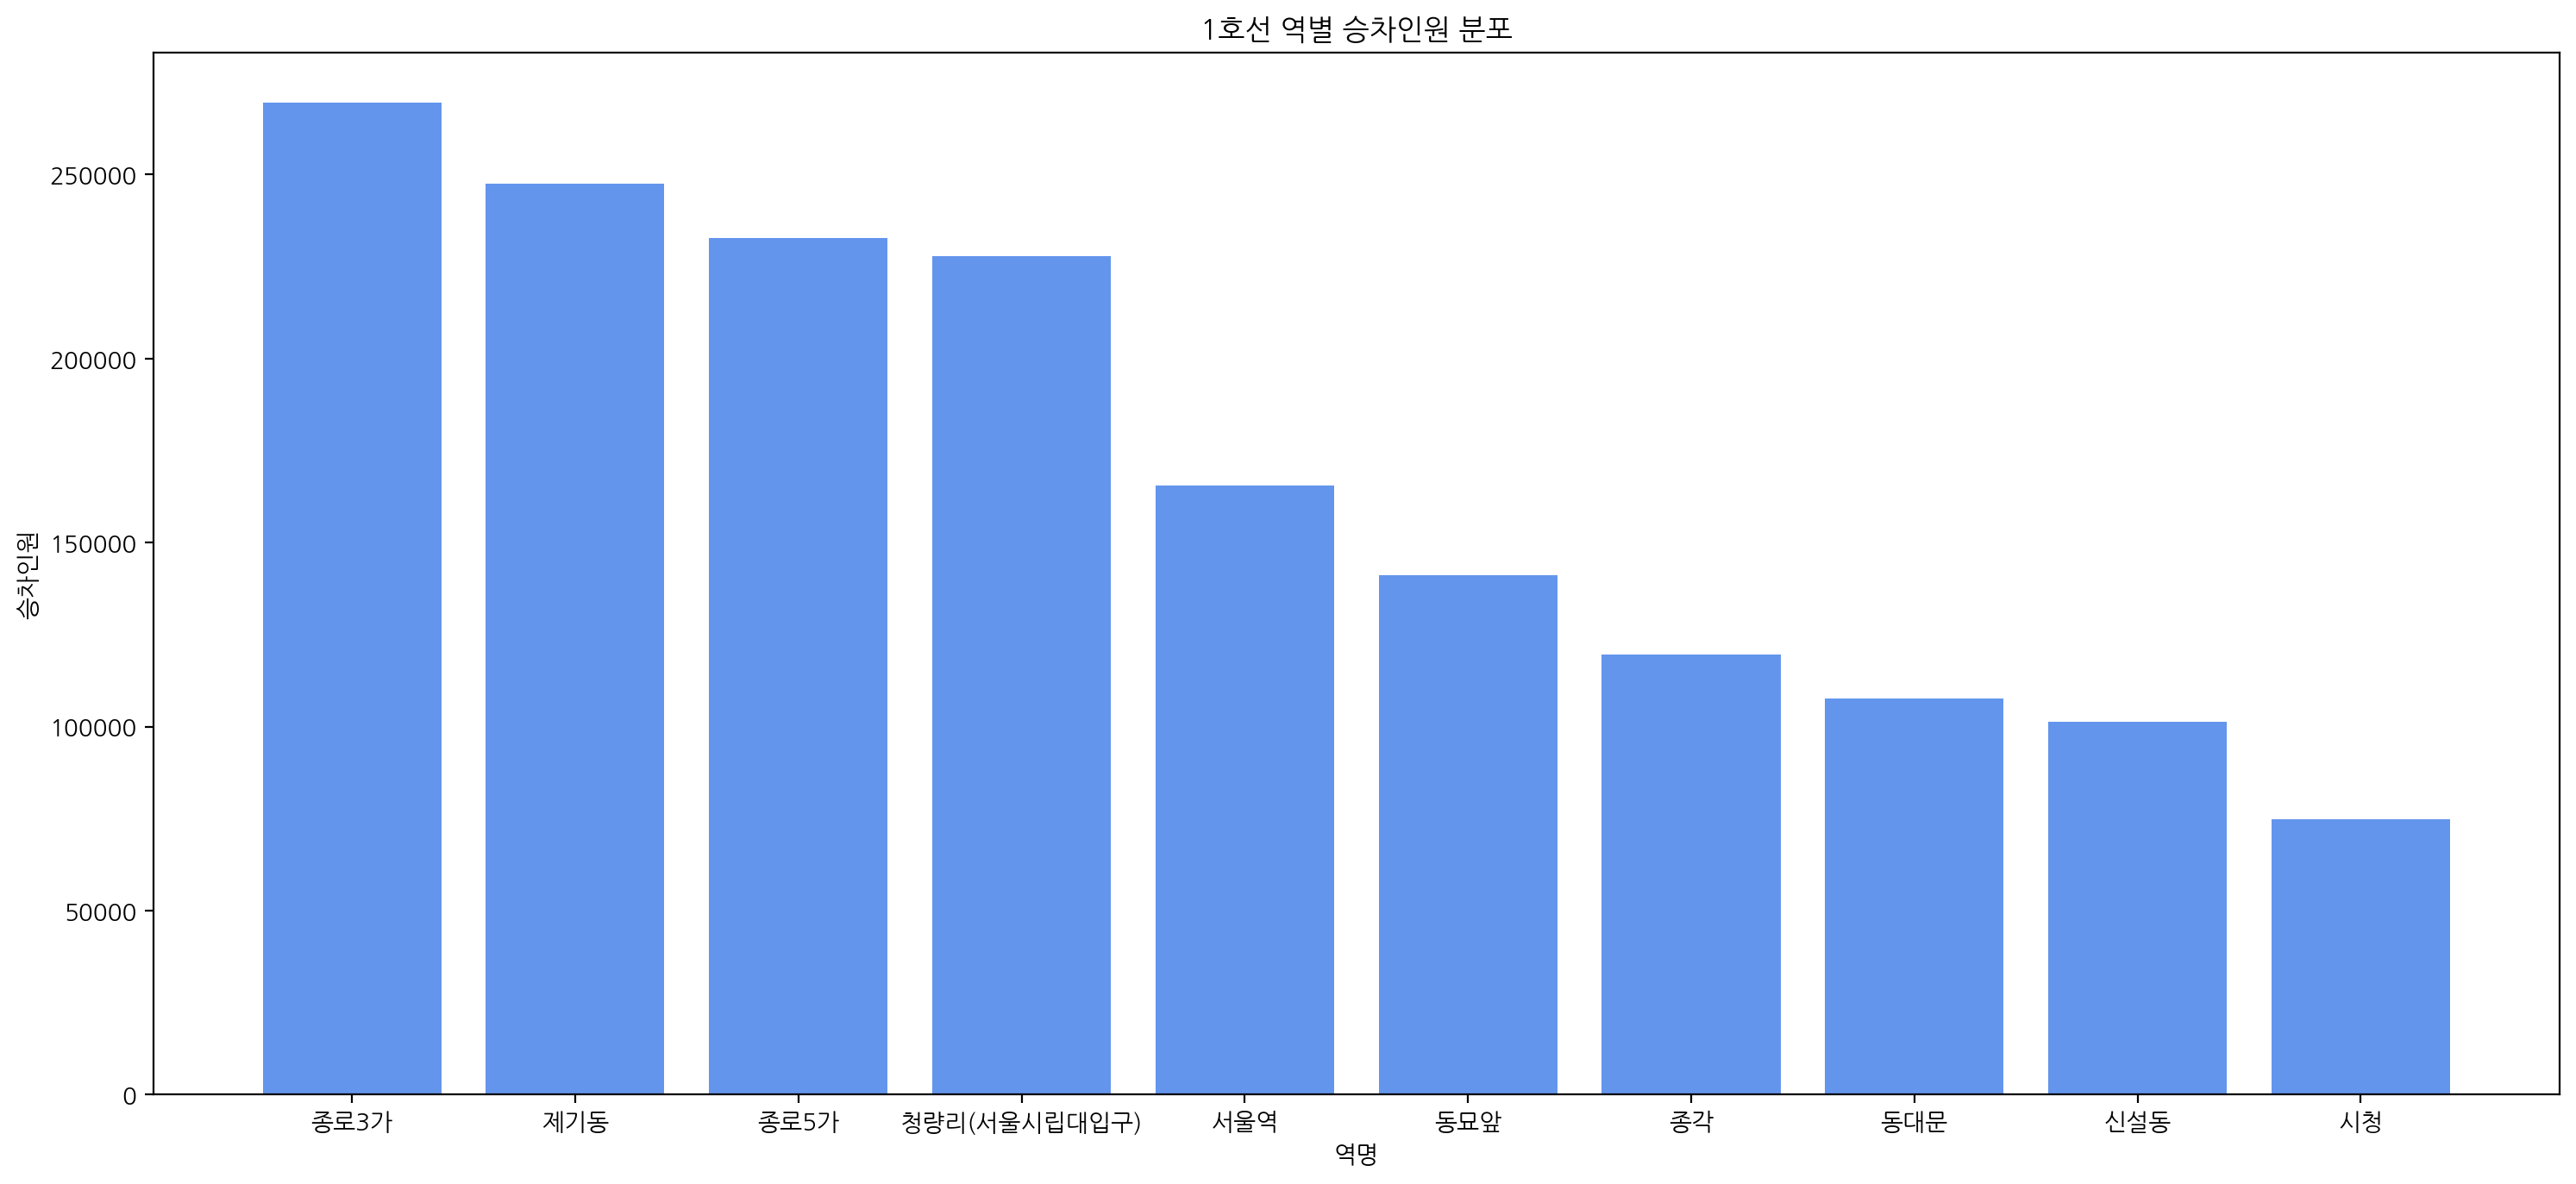

In [19]:
# 호선이 1이고 승하차구분이 '승차'인 데이터 추출
filtered_data = data[(data['호선'] == 1) & (data['승하차구분'] == '승차')]

# 역명과 승차인원 열 선택
station_boarding1 = filtered_data[['역명', '승하차인원수']]

# 승차인원수를 기준으로 내림차순 정렬
station_boarding1_sorted = station_boarding1.sort_values(by='승하차인원수', ascending=False)

# 역별 승차인원 분포 시각화
plt.figure(figsize=(18, 8), dpi=200)
plt.bar(station_boarding1_sorted['역명'], station_boarding1_sorted['승하차인원수'], color='cornflowerblue')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('1호선 역별 승차인원 분포')
plt.xticks(rotation=0)
plt.show()

- 종로3가역 승차인원 가장 많다.

# 추가 ) TOP5

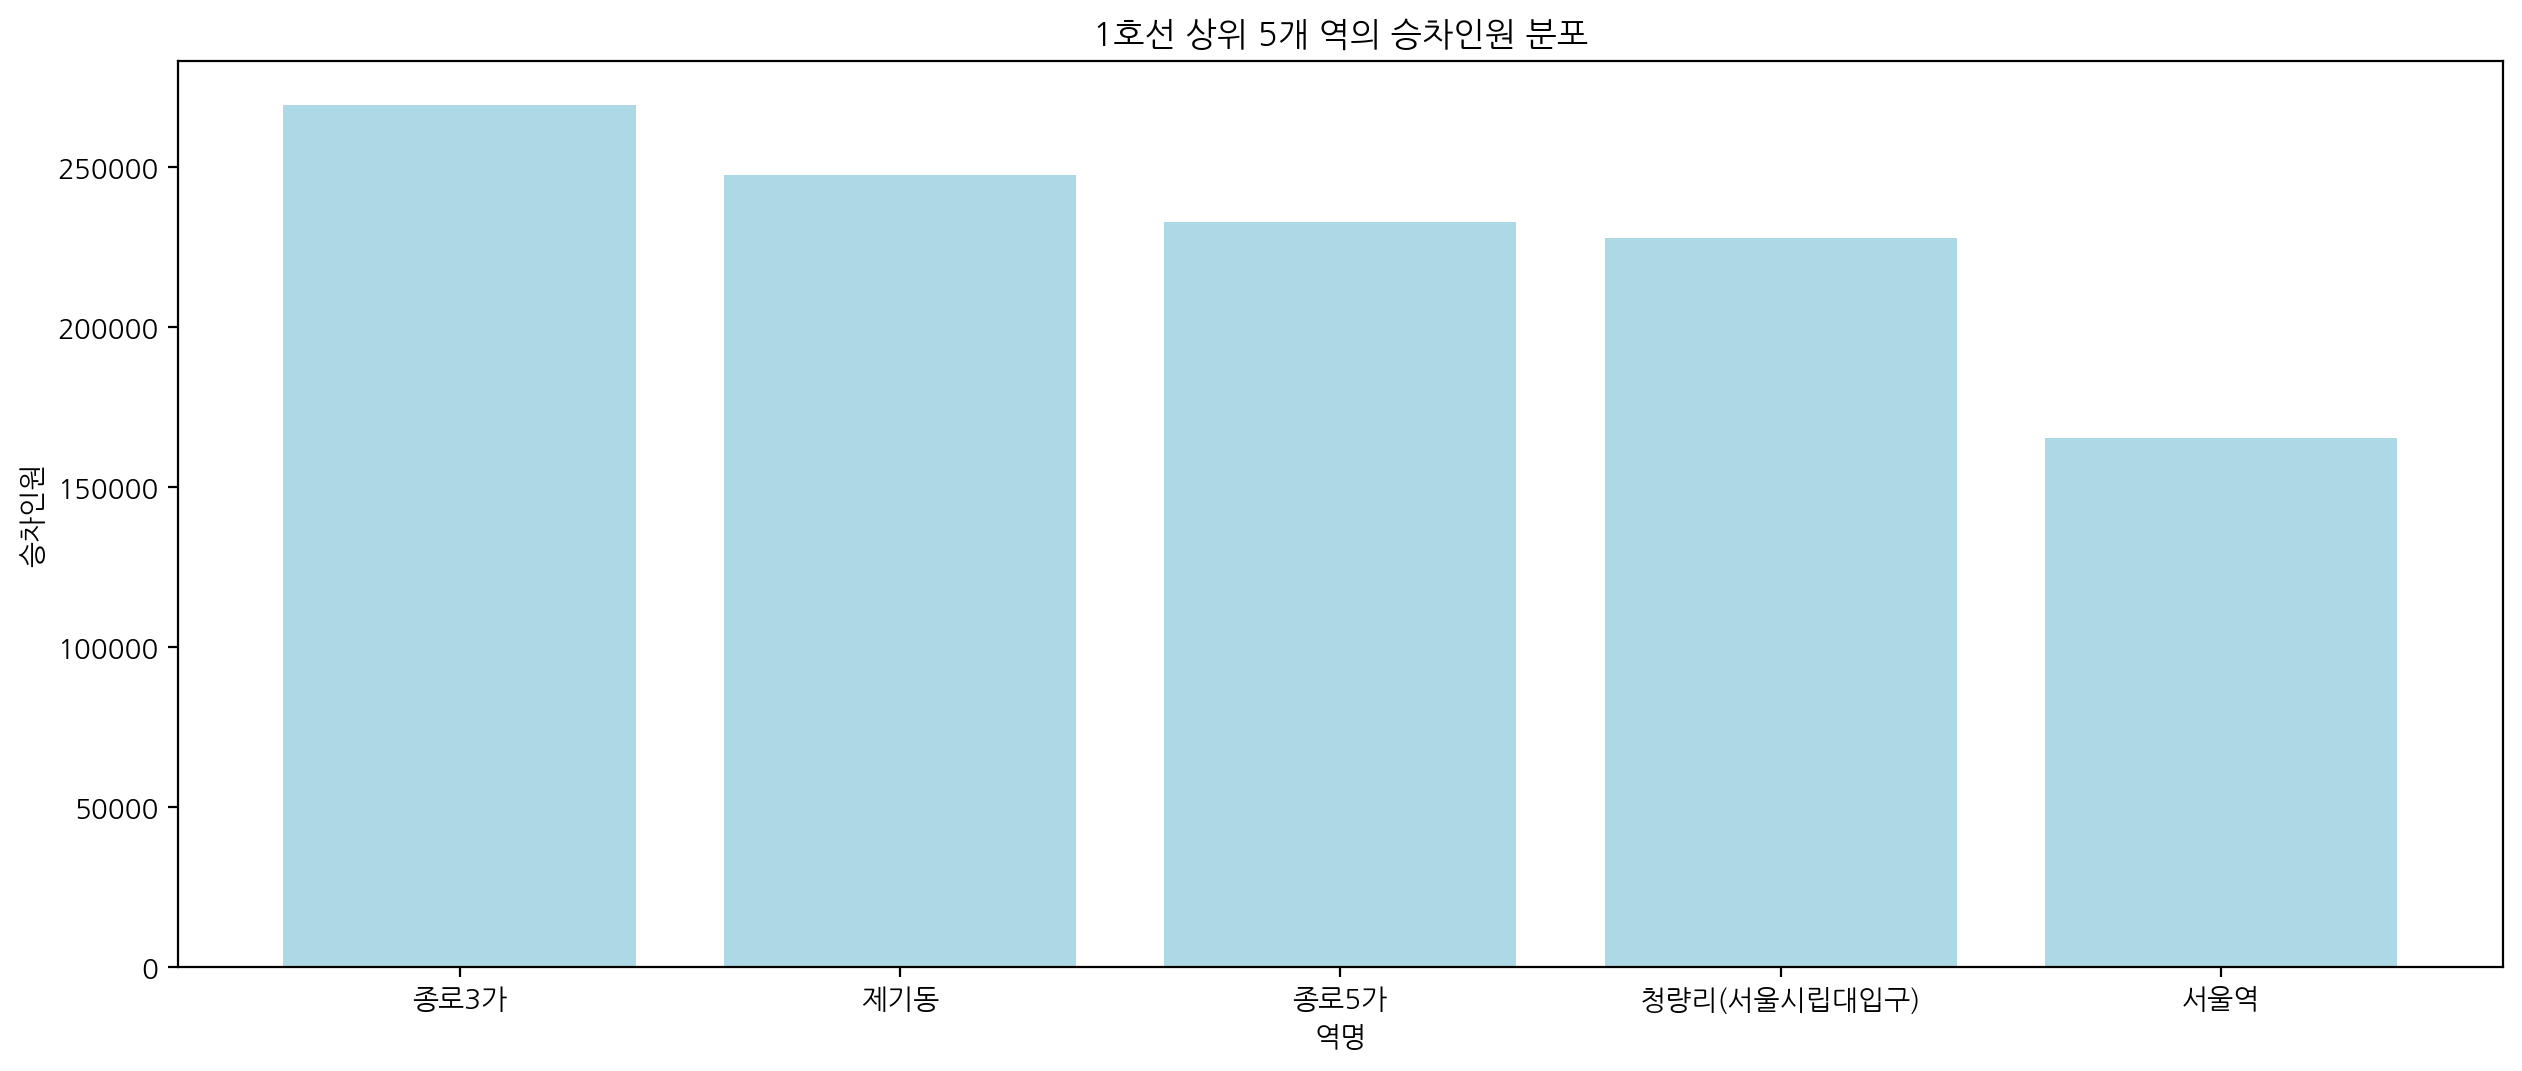

In [21]:
# 1호선 상위 5개 역 선정
top_5_stations = station_boarding1[station_boarding1['역명'].isin(['종로3가', '제기동', '종로5가', '청량리(서울시립대입구)', '서울역'])]

# 역명 기준으로 내림차순 정렬
top_5_stations = top_5_stations.sort_values(by='승하차인원수', ascending=False)

# 상위 5개 역의 승차인원 분포 시각화
plt.figure(figsize=(15, 6), dpi=200)
plt.bar(top_5_stations['역명'], top_5_stations['승하차인원수'], color='lightblue')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('1호선 상위 5개 역의 승차인원 분포')
plt.xticks(rotation=0)
plt.show()

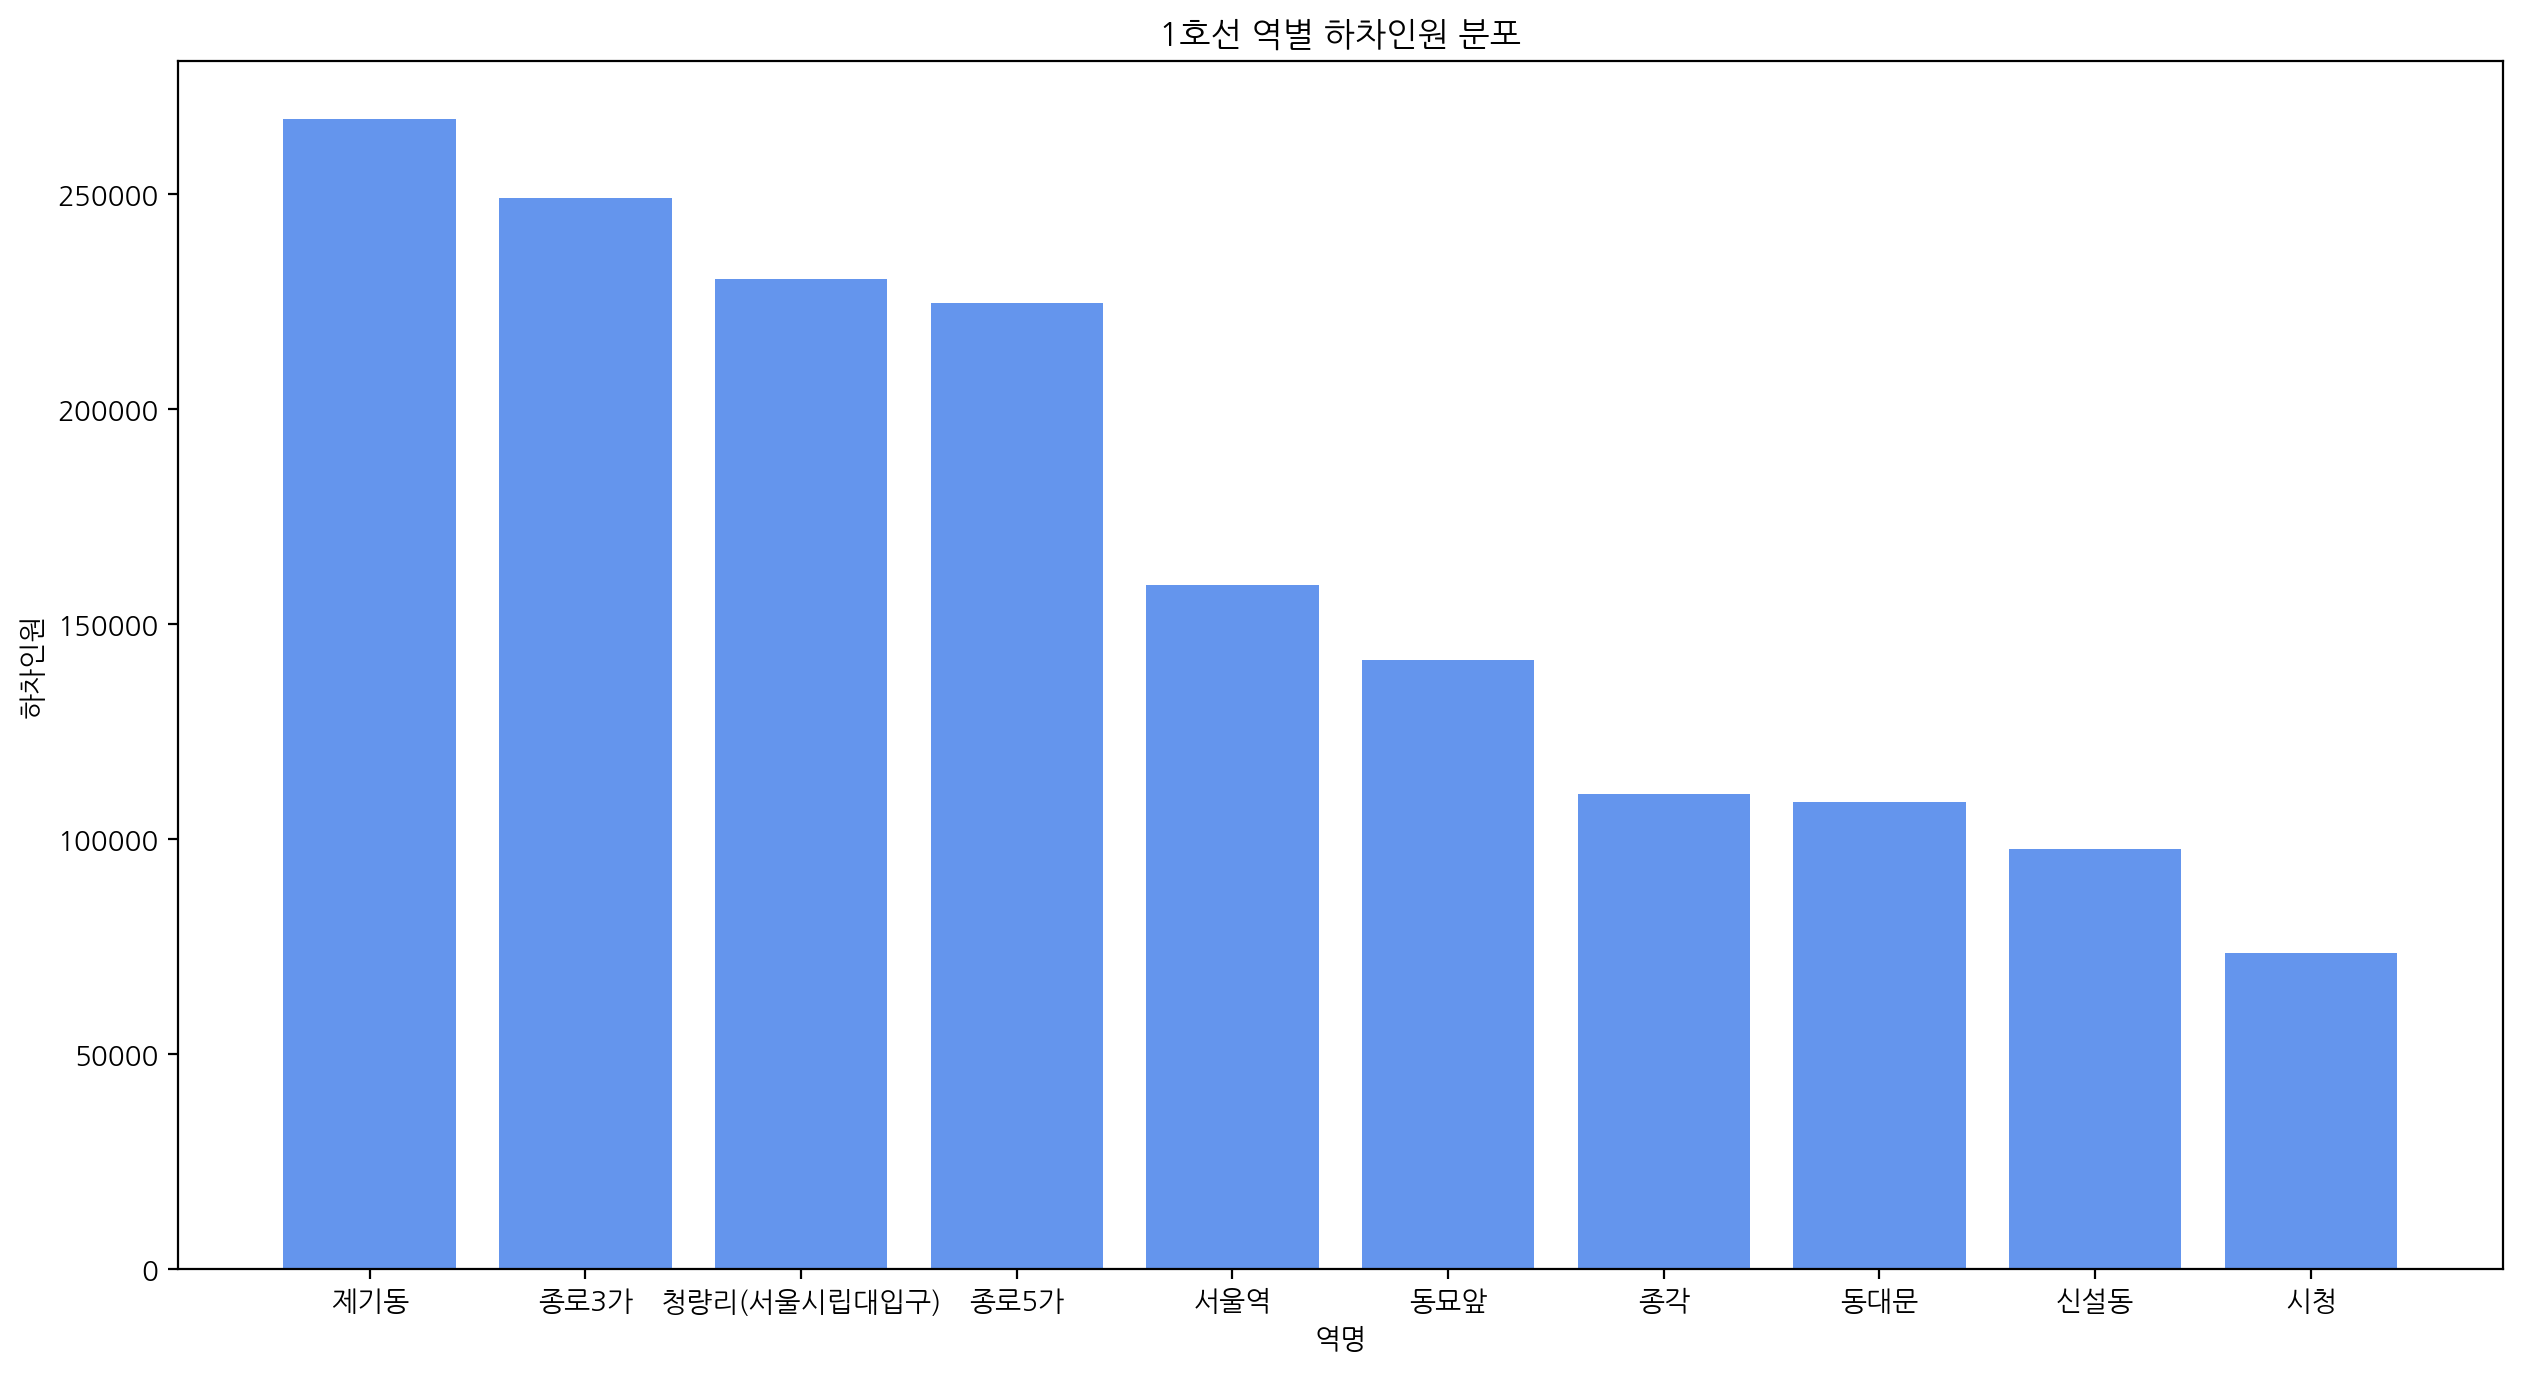

In [24]:
# 호선이 1이고 승하차구분이 '하차'인 데이터 추출
filtered_data = data[(data['호선'] == 1) & (data['승하차구분'] == '하차')]

# 역명과 하차인원 열 선택
station_boarding2 = filtered_data[['역명', '승하차인원수']]

# 하차인원수를 기준으로 내림차순 정렬
station_boarding2_sorted = station_boarding2.sort_values(by='승하차인원수', ascending=False)

# 역별 하차인원 분포 시각화
plt.figure(figsize=(15, 8), dpi=200)
plt.bar(station_boarding2_sorted['역명'], station_boarding2_sorted['승하차인원수'], color='cornflowerblue')
plt.xlabel('역명')
plt.ylabel('하차인원')
plt.title('1호선 역별 하차인원 분포')
plt.xticks(rotation=0)
plt.show()


- 승차인원 분포와 다르게 제기동역에서 하차인원이 제일 많다

# 추가 ) TOP5

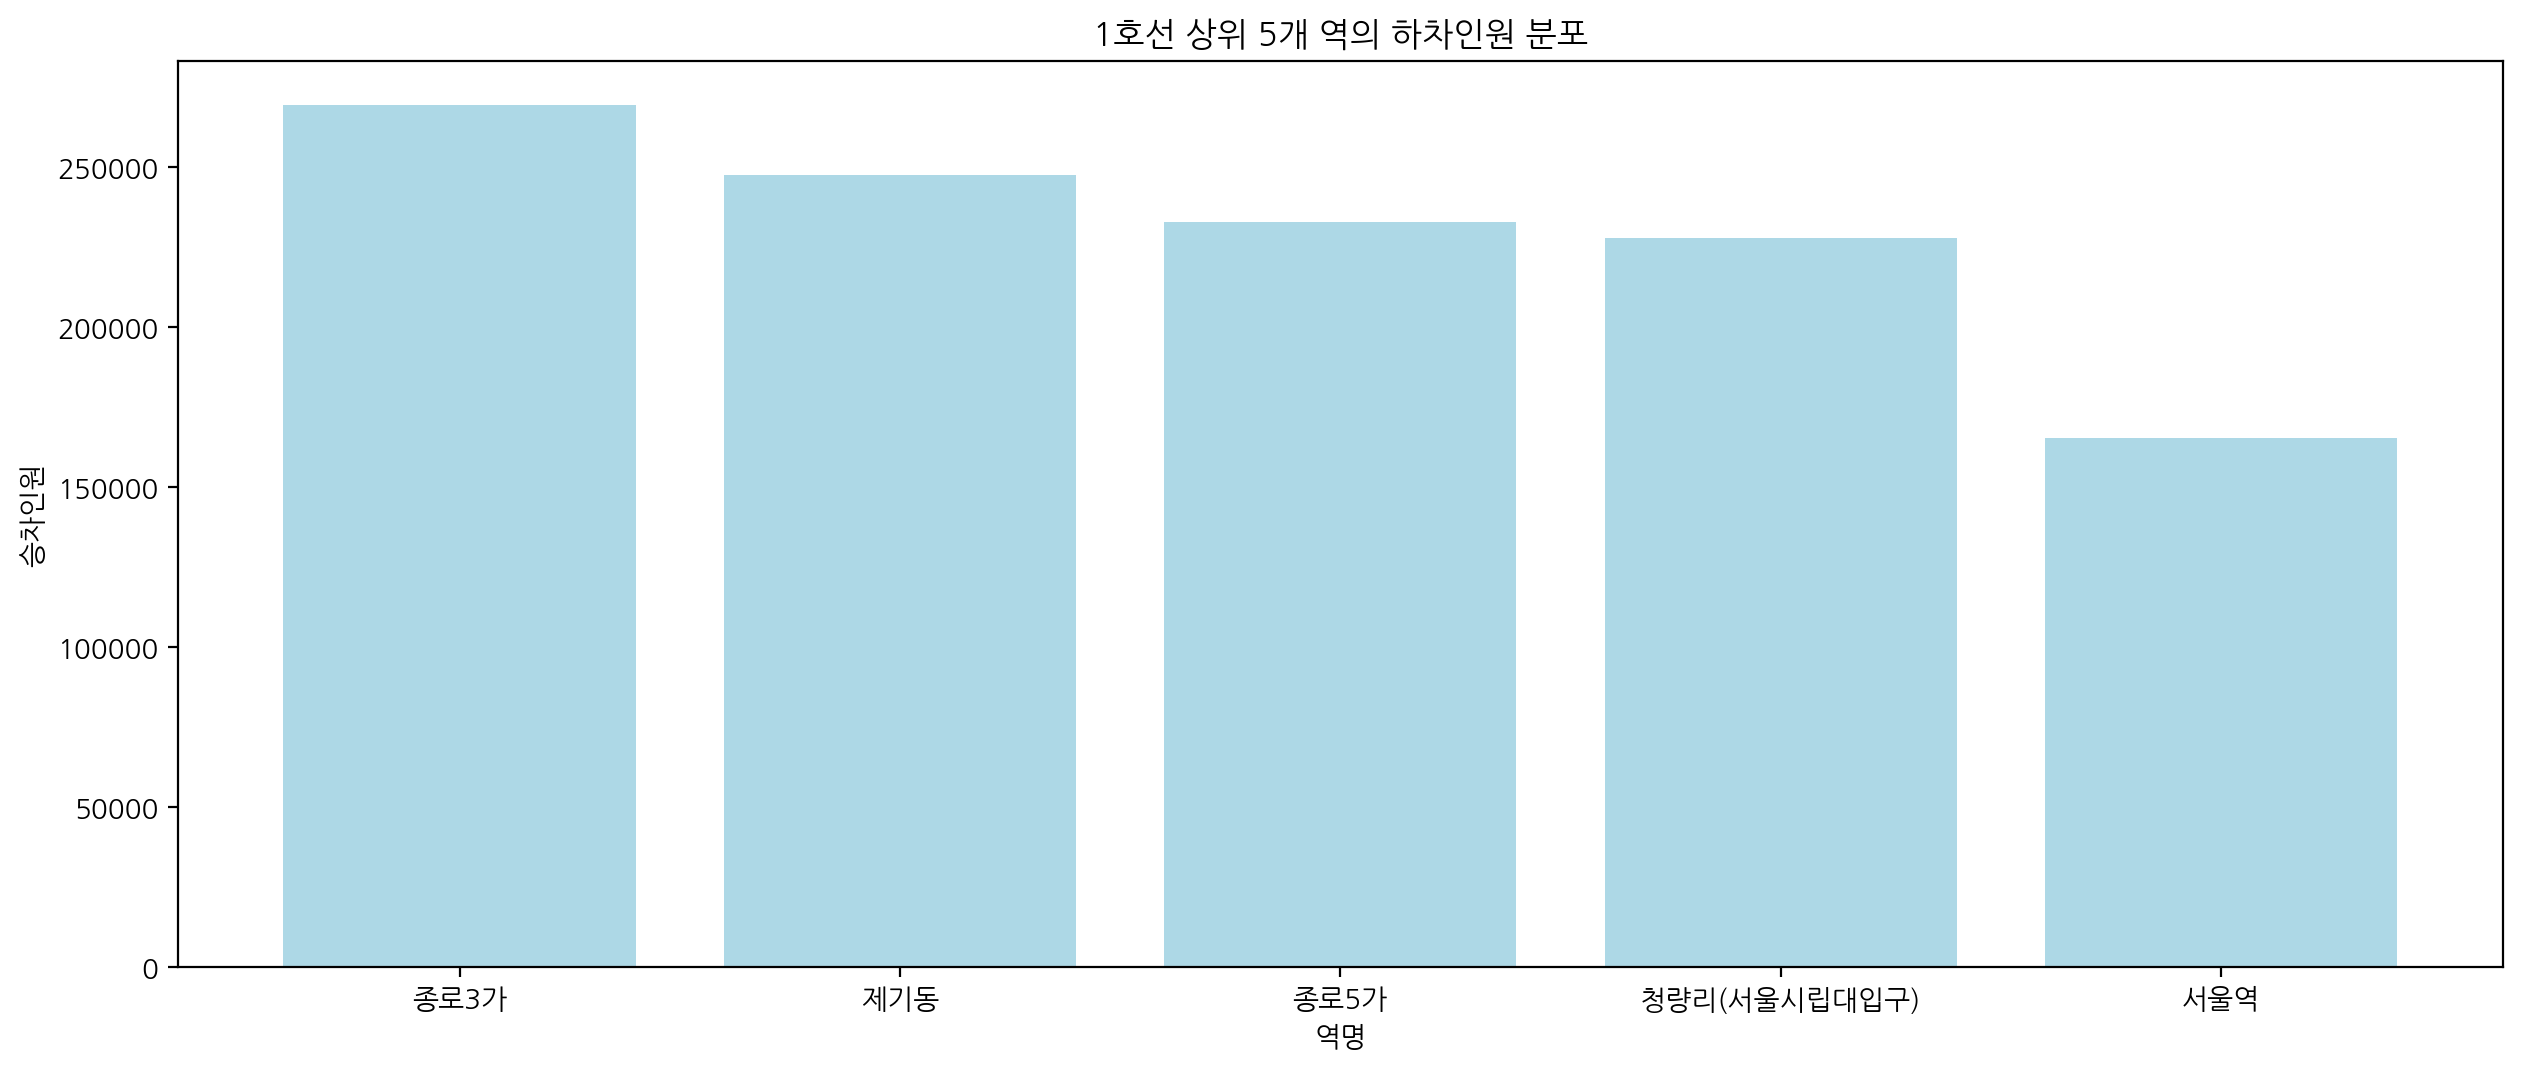

In [26]:
# 1호선 상위 5개 역 선정
top_5_stations = station_boarding1[station_boarding1['역명'].isin(['종로3가', '제기동', '종로5가', '청량리(서울시립대입구)', '서울역'])]

# 역명 기준으로 내림차순 정렬
top_5_stations = top_5_stations.sort_values(by='승하차인원수', ascending=False)

# 상위 5개 역의 하차인원 분포 시각화
plt.figure(figsize=(15, 6), dpi=200)
plt.bar(top_5_stations['역명'], top_5_stations['승하차인원수'], color='lightblue')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('1호선 상위 5개 역의 하차인원 분포')
plt.xticks(rotation=0)
plt.show()


6### 2) 호선별 승차/하차 인원 분포 (1호선-8호선)

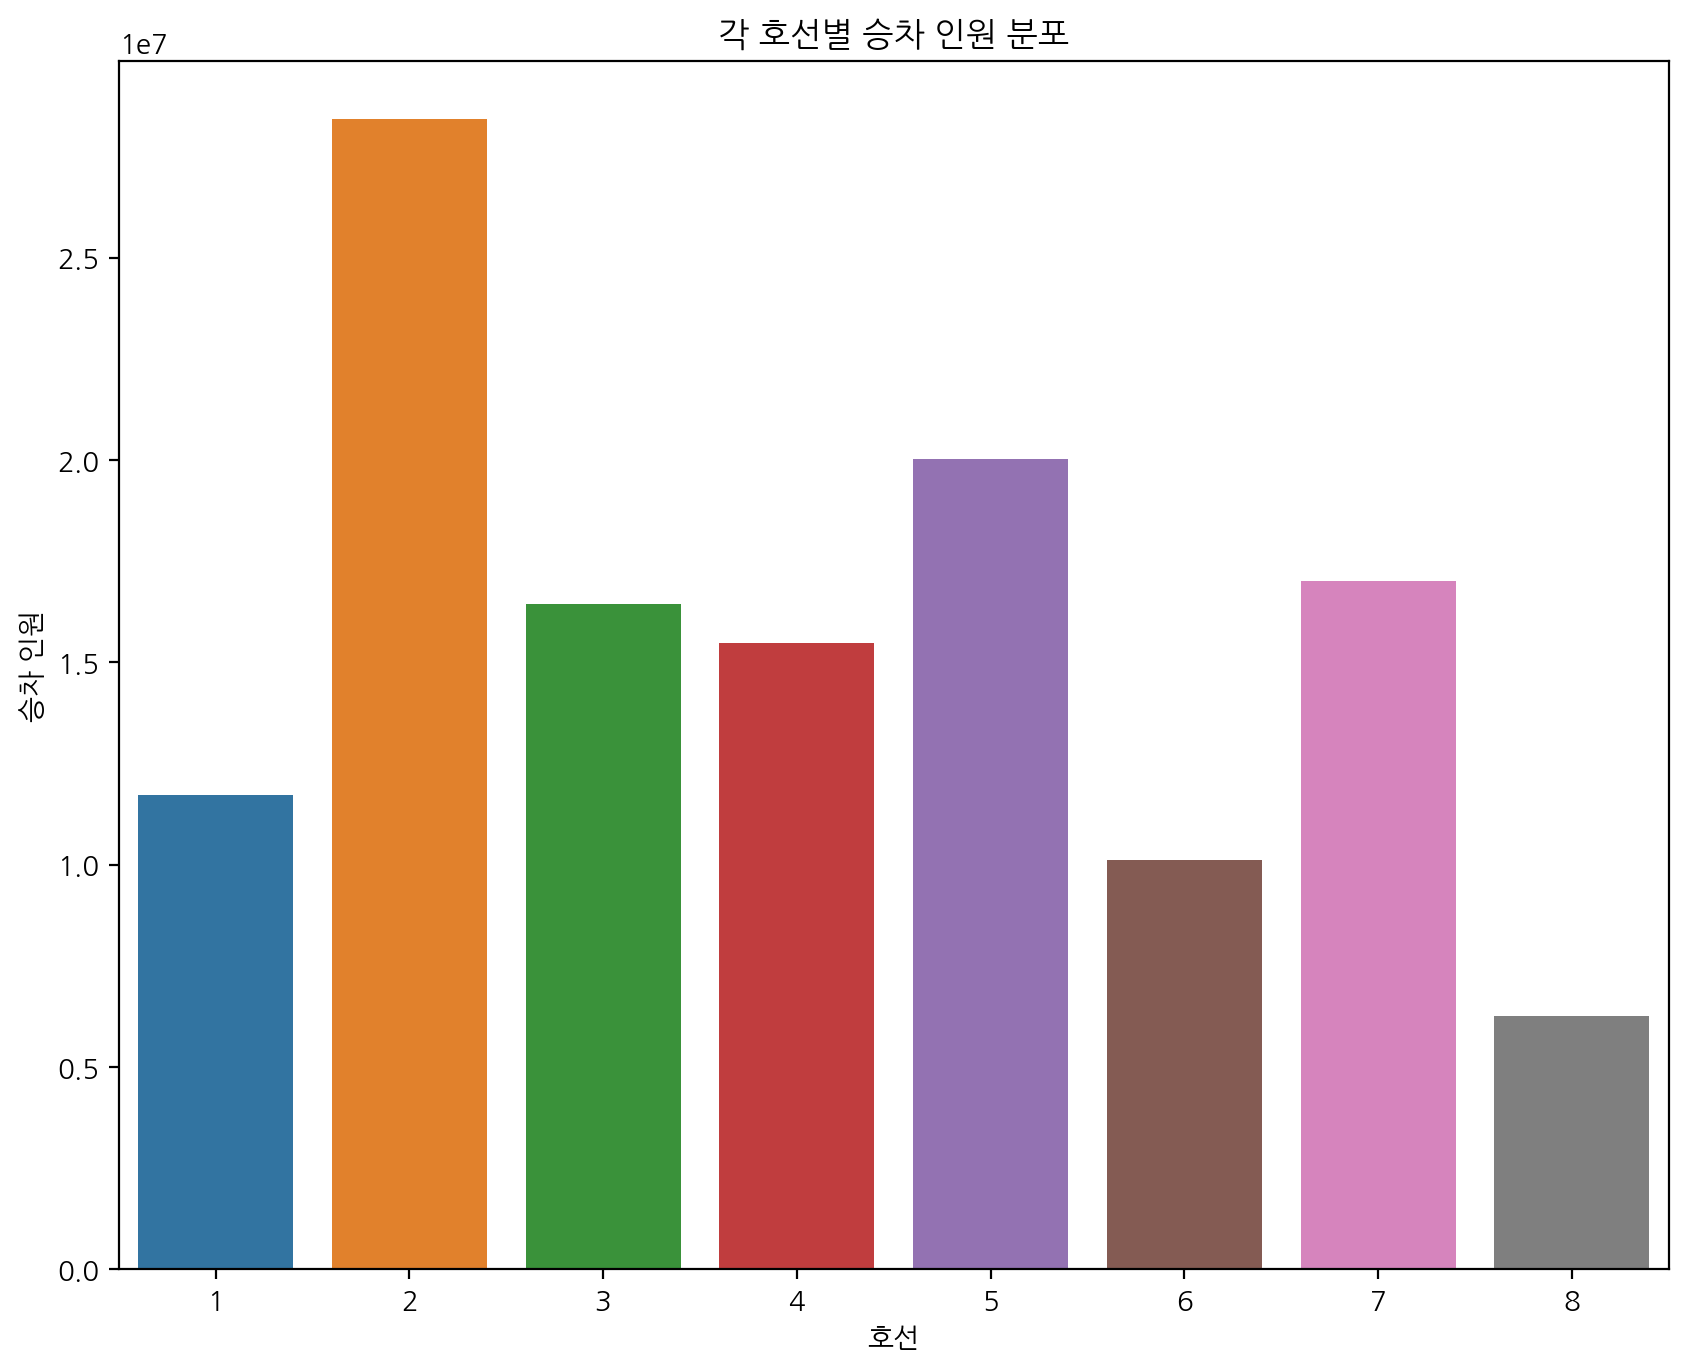

In [19]:
# 승차 데이터만 추출
boarding_data = data[data['승하차구분'] == '승차']

# 호선별 승차 인원 데이터 추출
line_data = boarding_data.groupby('호선')['승하차인원수'].sum()

plt.figure(figsize=(10, 8), dpi=200)  # 그래프 크기 조정
sns.barplot(x=line_data.index, y=line_data.values)  # 막대 그래프 그리기

plt.xlabel('호선')
plt.ylabel('승차 인원')
plt.title('각 호선별 승차 인원 분포')
plt.show()

- 2호선의 승차 인원 분포가 비교되게 높다

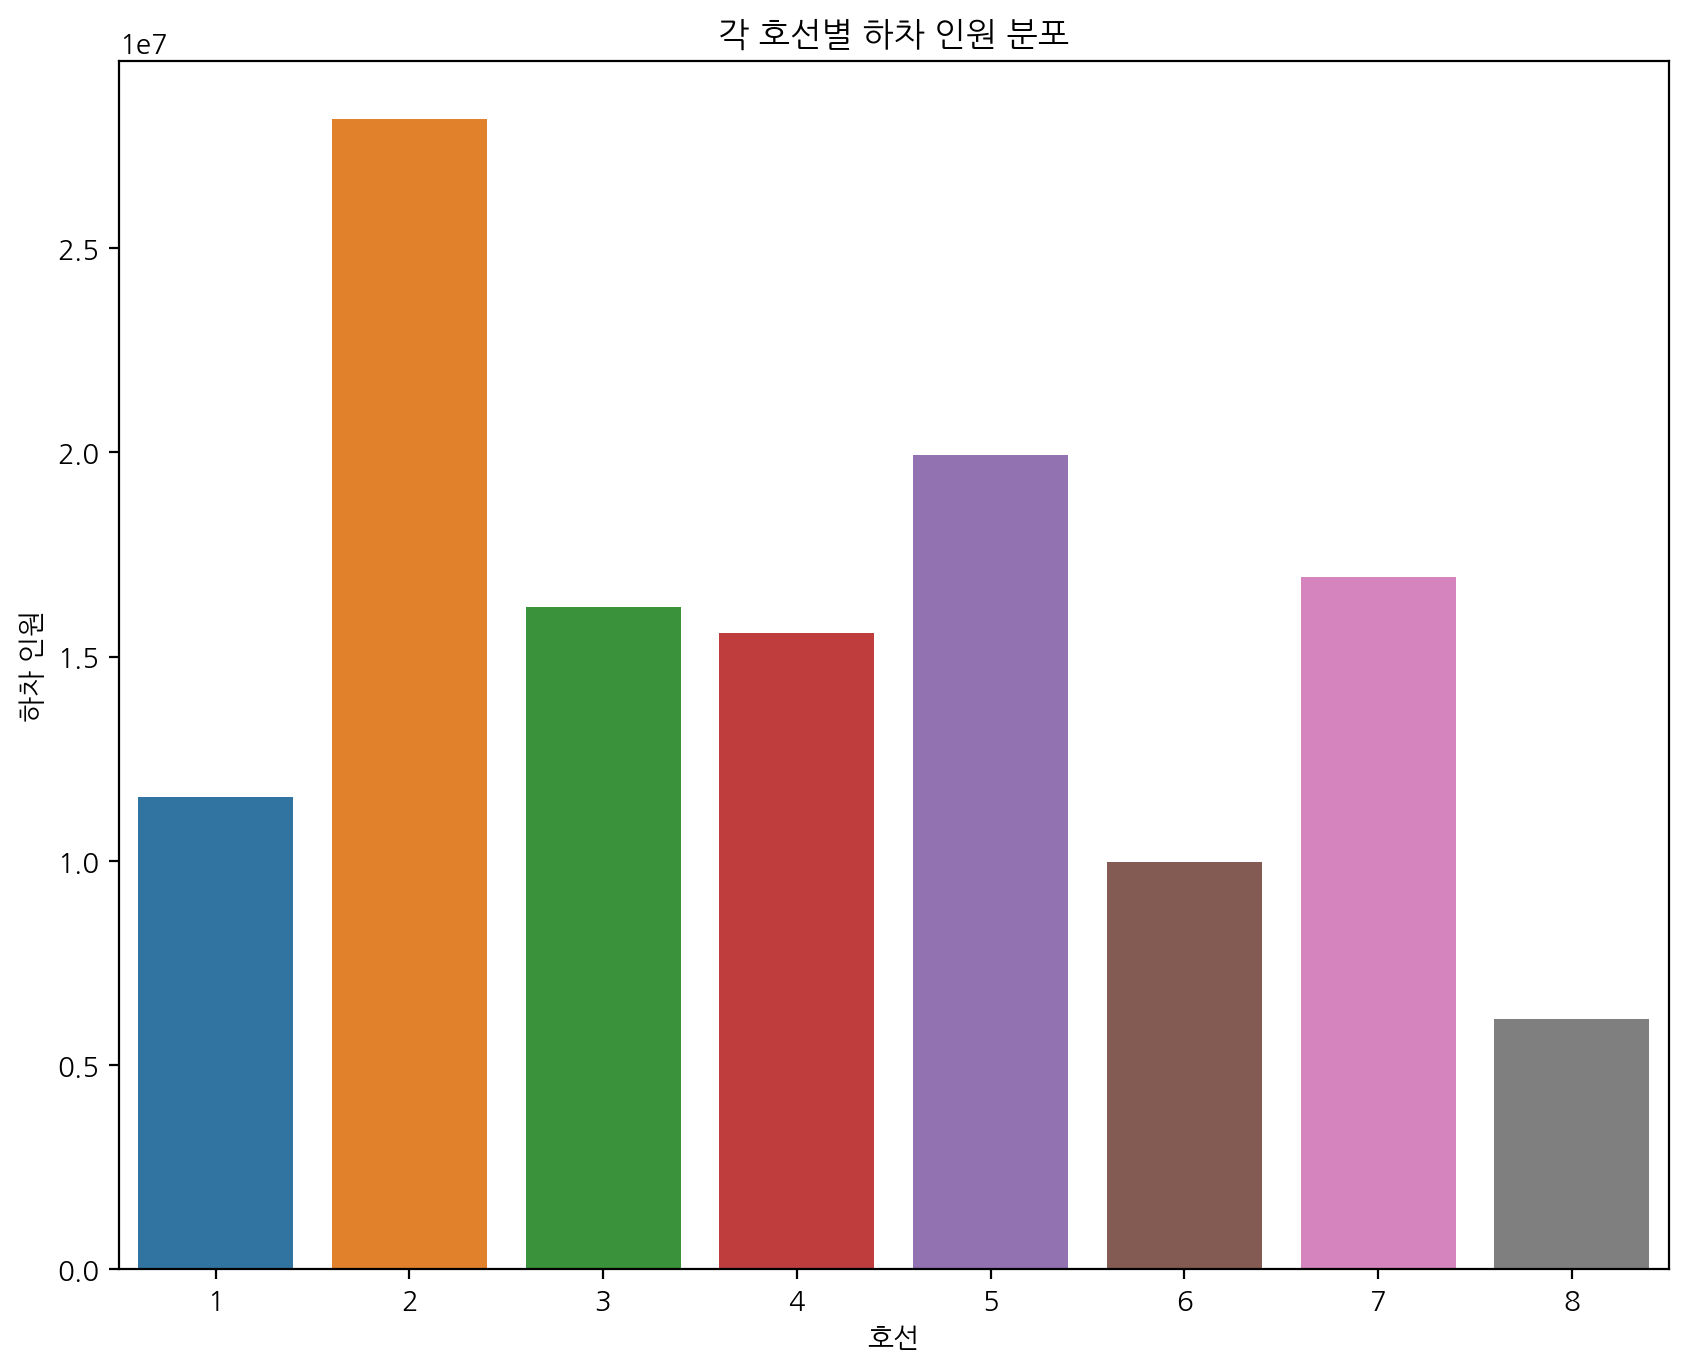

In [20]:
# 하차 데이터만 추출
boarding_data = data[data['승하차구분'] == '하차']

# 호선별 하차 인원 데이터 추출
line_data = boarding_data.groupby('호선')['승하차인원수'].sum()

plt.figure(figsize=(10, 8), dpi=200)  # 그래프 크기 조정
sns.barplot(x=line_data.index, y=line_data.values)  # 막대 그래프 그리기

plt.xlabel('호선')
plt.ylabel('하차 인원')
plt.title('각 호선별 하차 인원 분포')
plt.show()

- 승차인원 분포와 유사한 양상을 보인다
- 마찬가지로 2호선의 분포가 가장 높다

# 2호선과 5호선에서의 노인 승하차 비율이 가장 높다

# !!! 추가 : 호선별 승차/하차 분포 내림차순 정렬 : 2호선, 5호선

2호선

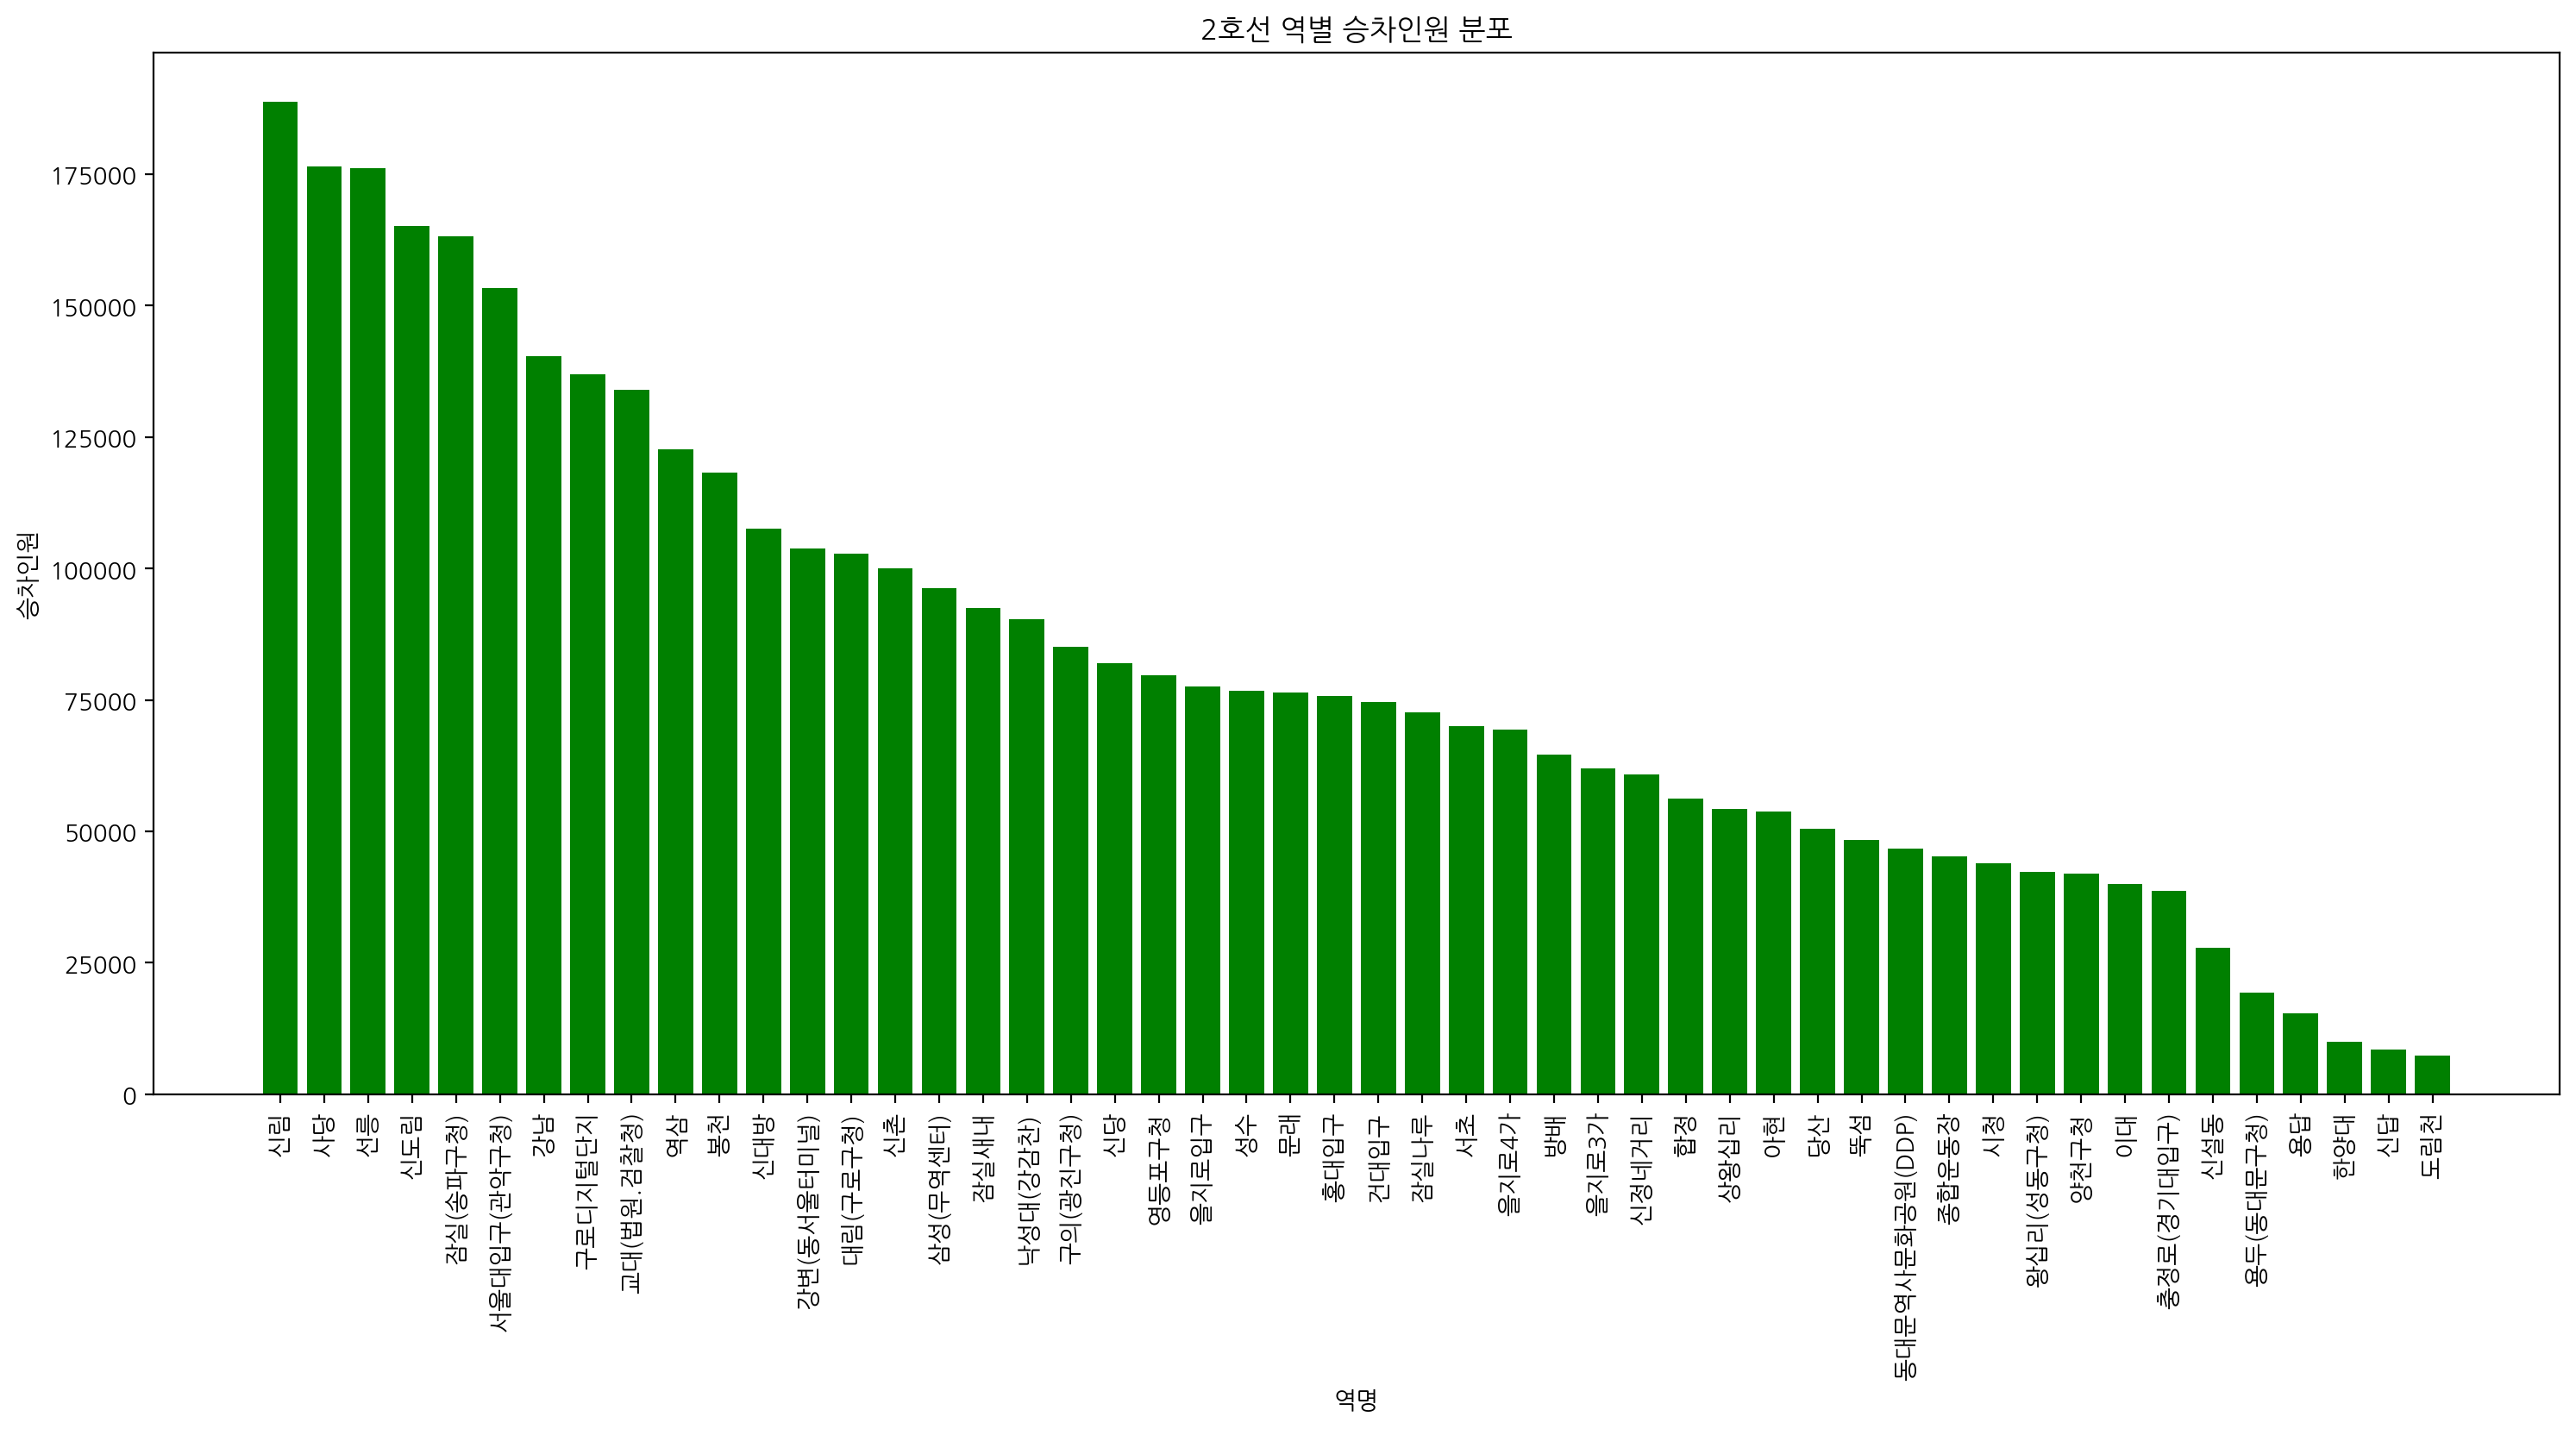

In [40]:
# 호선이 2이고 승하차구분이 '승차'인 데이터 추출
filtered_data = data[(data['호선'] == 2) & (data['승하차구분'] == '승차')]

# 역명과 승차인원 열 선택
station_boarding1 = filtered_data[['역명', '승하차인원수']]

# 승차인원수를 기준으로 내림차순 정렬
station_boarding1_sorted = station_boarding1.sort_values(by='승하차인원수', ascending=False)

# 역별 승차인원 분포 시각화
plt.figure(figsize=(18, 8), dpi=200)
plt.bar(station_boarding1_sorted['역명'], station_boarding1_sorted['승하차인원수'], color='green')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('2호선 역별 승차인원 분포')
plt.xticks(rotation=90)
plt.show()

# Top5

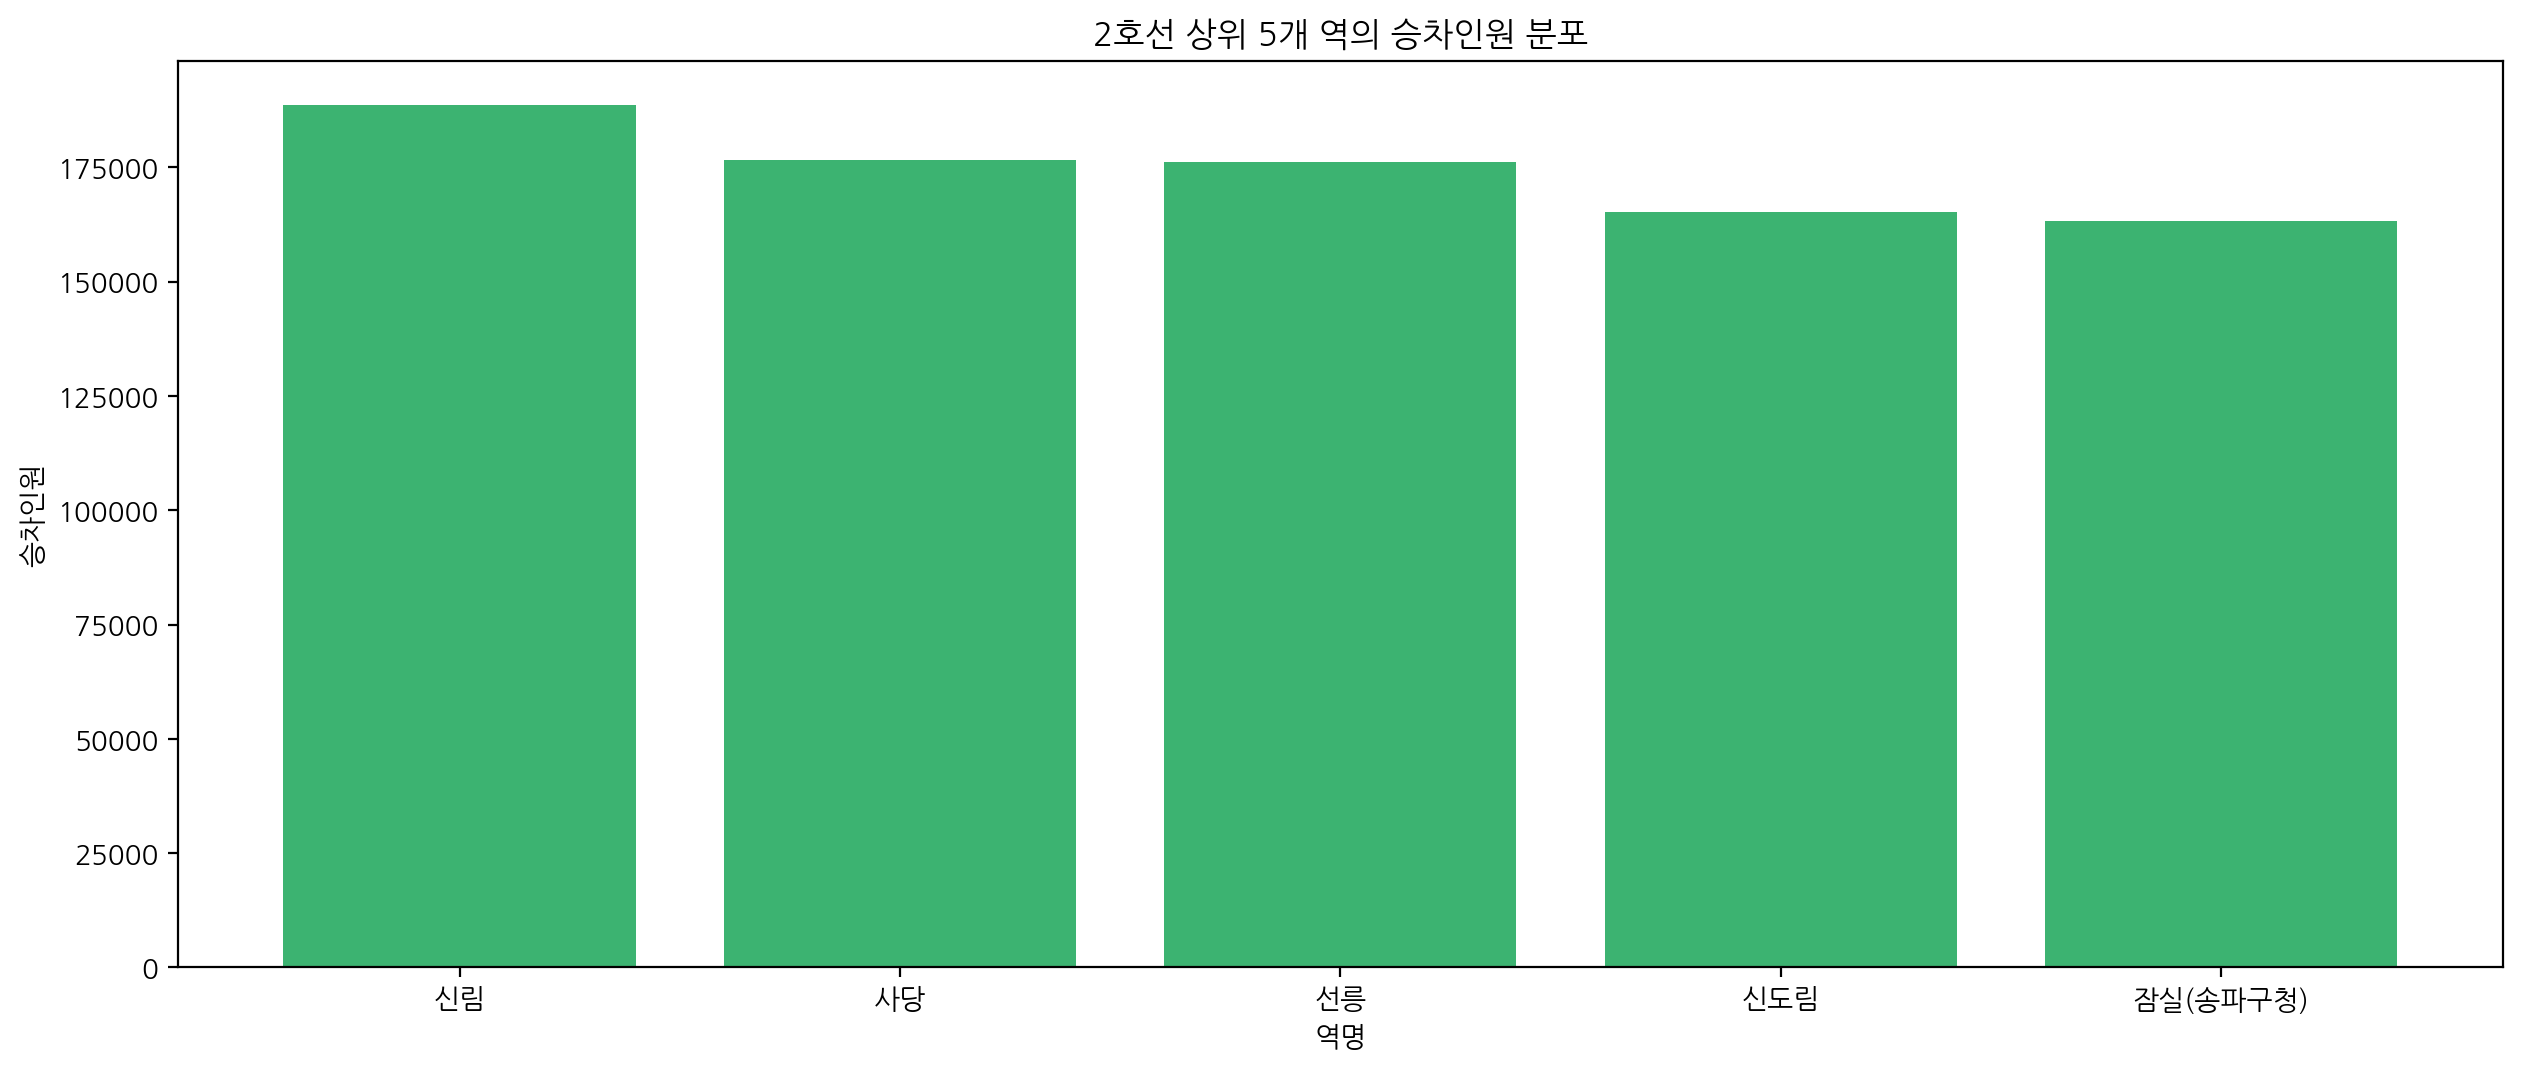

In [42]:
# 2호선 상위 5개 역 선정
top_5_stations = station_boarding1[station_boarding1['역명'].isin(['신림','사당','선릉','신도림','잠실(송파구청)'])]

# 역명 기준으로 내림차순 정렬
top_5_stations = top_5_stations.sort_values(by='승하차인원수', ascending=False)

# 상위 5개 역의 승차인원 분포 시각화
plt.figure(figsize=(15, 6), dpi=200)
plt.bar(top_5_stations['역명'], top_5_stations['승하차인원수'], color='mediumseagreen')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('2호선 상위 5개 역의 승차인원 분포')
plt.xticks(rotation=0)
plt.show()

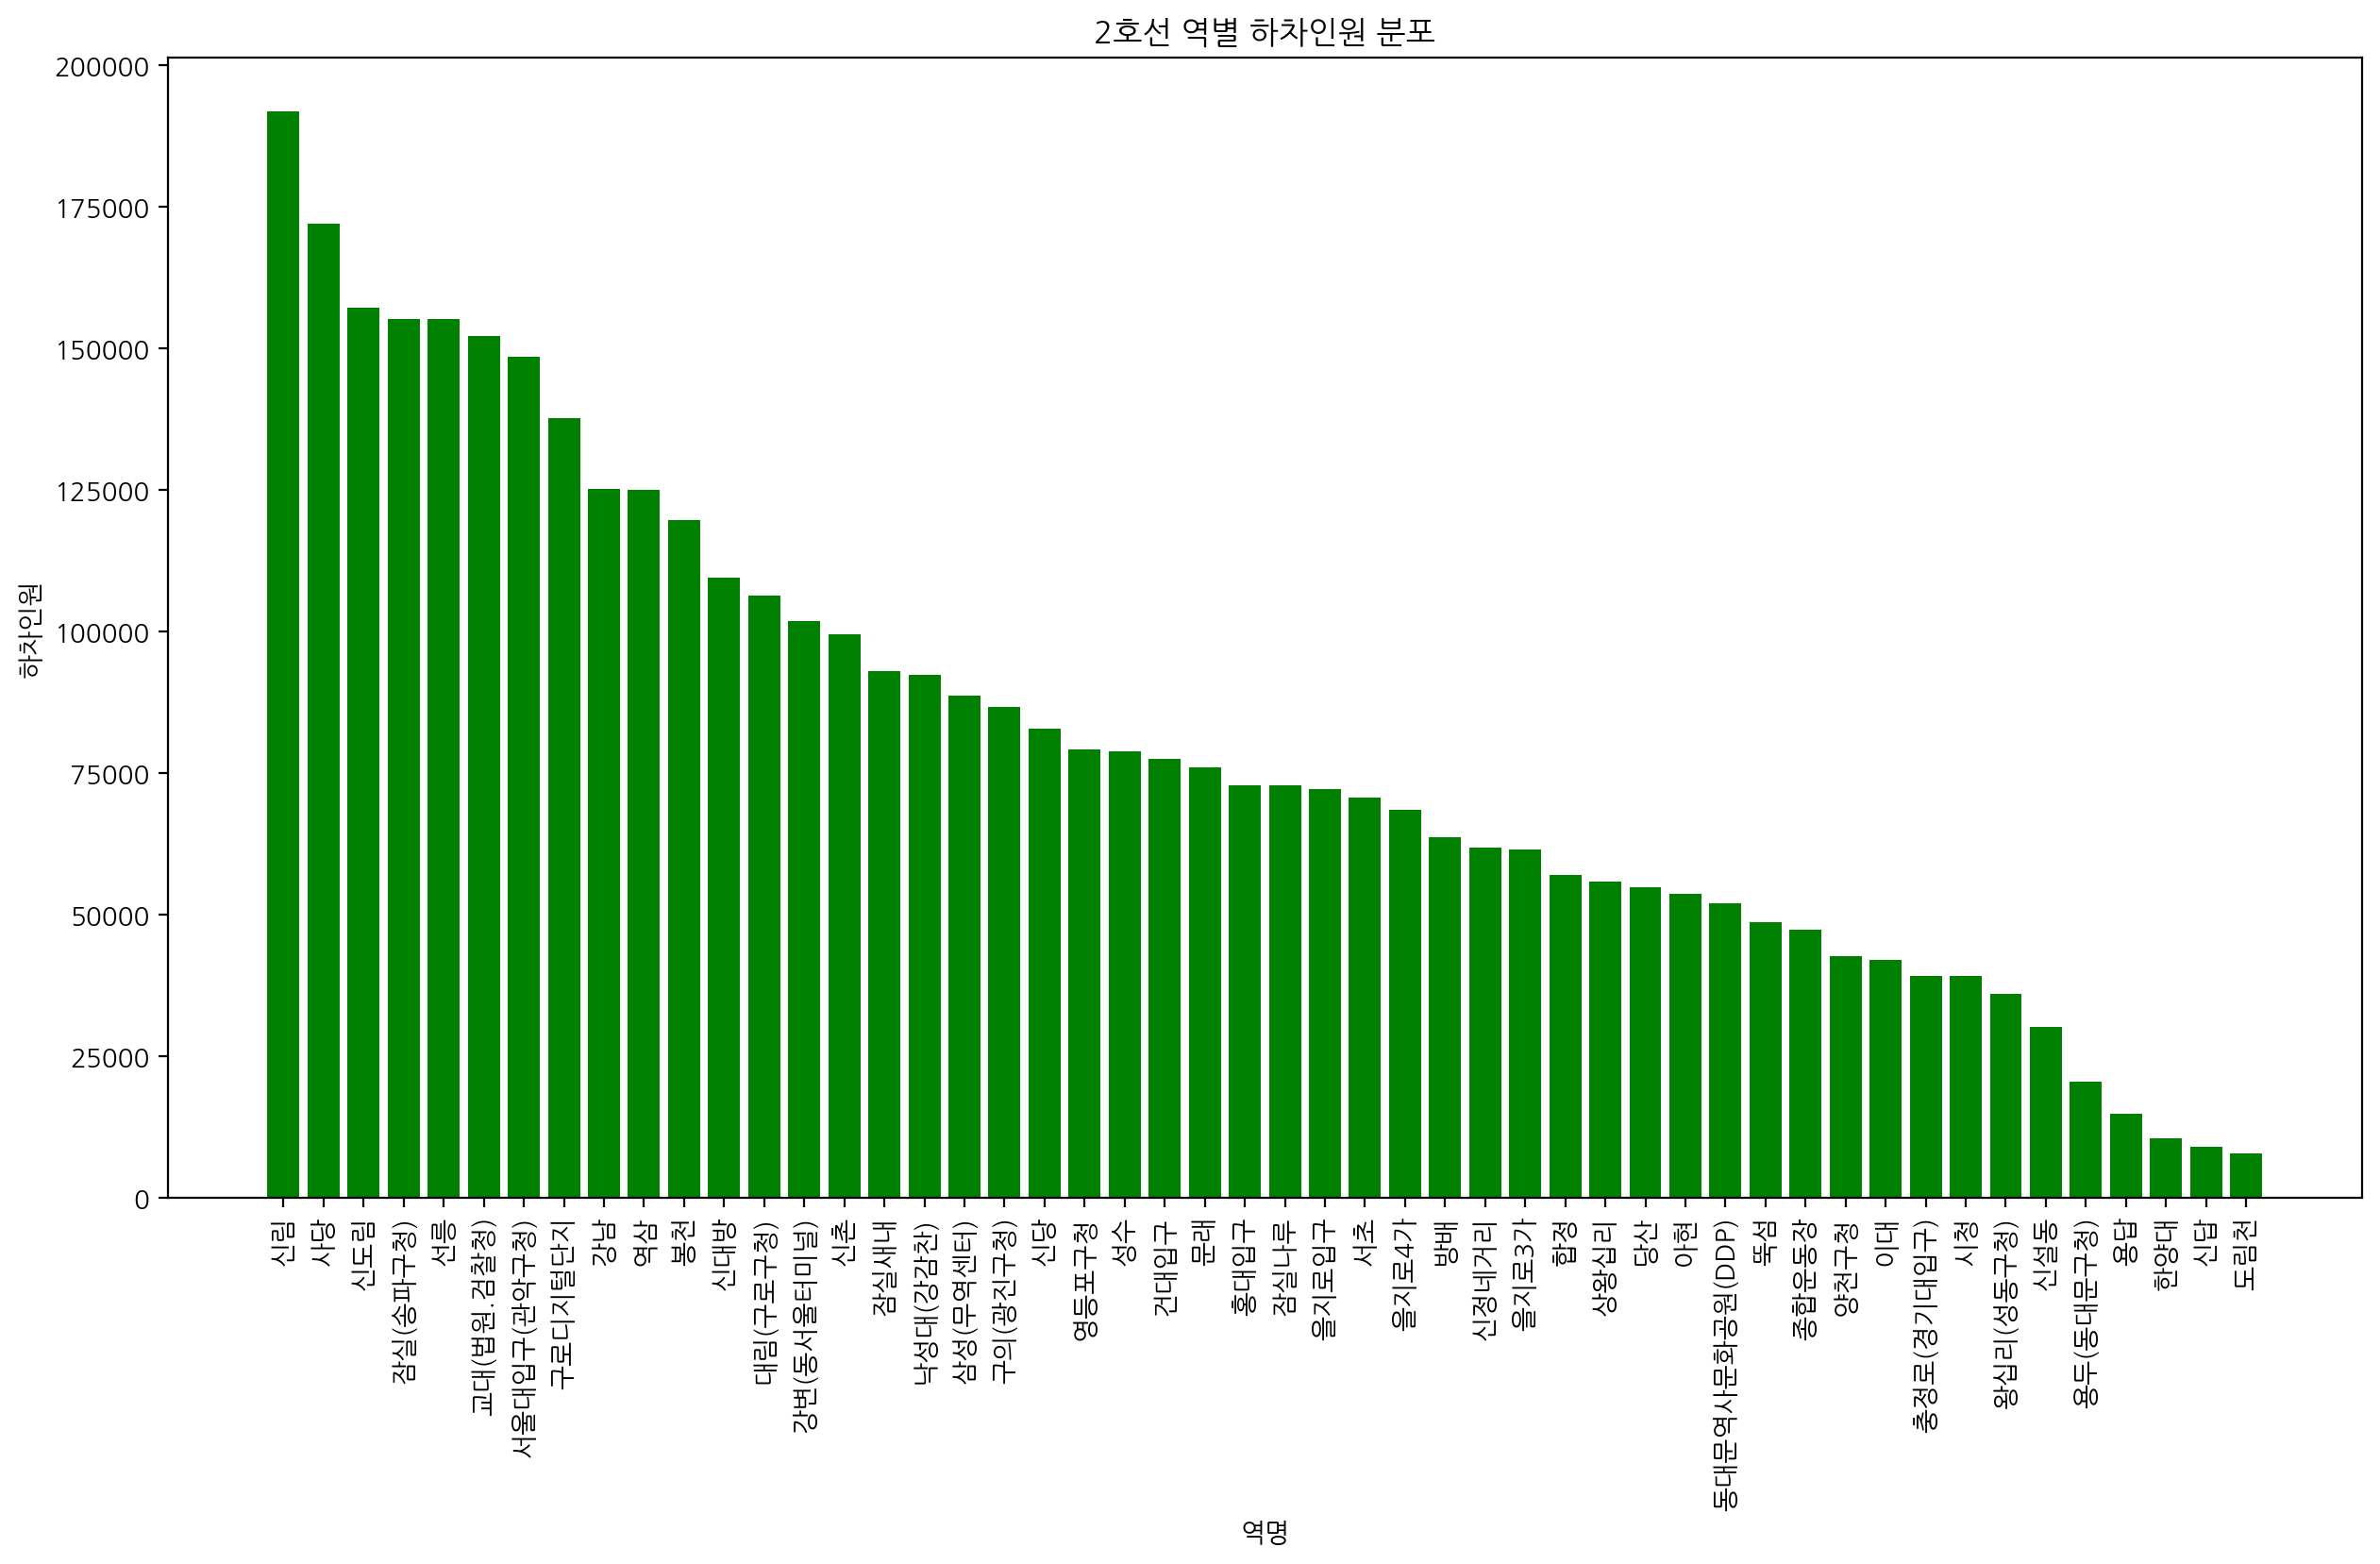

In [43]:
# 호선이 2이고 승하차구분이 '하차'인 데이터 추출
filtered_data = data[(data['호선'] == 2) & (data['승하차구분'] == '하차')]

# 역명과 하차인원 열 선택
station_boarding2 = filtered_data[['역명', '승하차인원수']]

# 승차인원수를 기준으로 내림차순 정렬
station_boarding2_sorted = station_boarding2.sort_values(by='승하차인원수', ascending=False)

# 역별 하차인원 분포 시각화
plt.figure(figsize=(15, 8), dpi=200)
plt.bar(station_boarding2_sorted['역명'], station_boarding2_sorted['승하차인원수'], color='green')
plt.xlabel('역명')
plt.ylabel('하차인원')
plt.title('2호선 역별 하차인원 분포')
plt.xticks(rotation=90)
plt.show()

# Top5

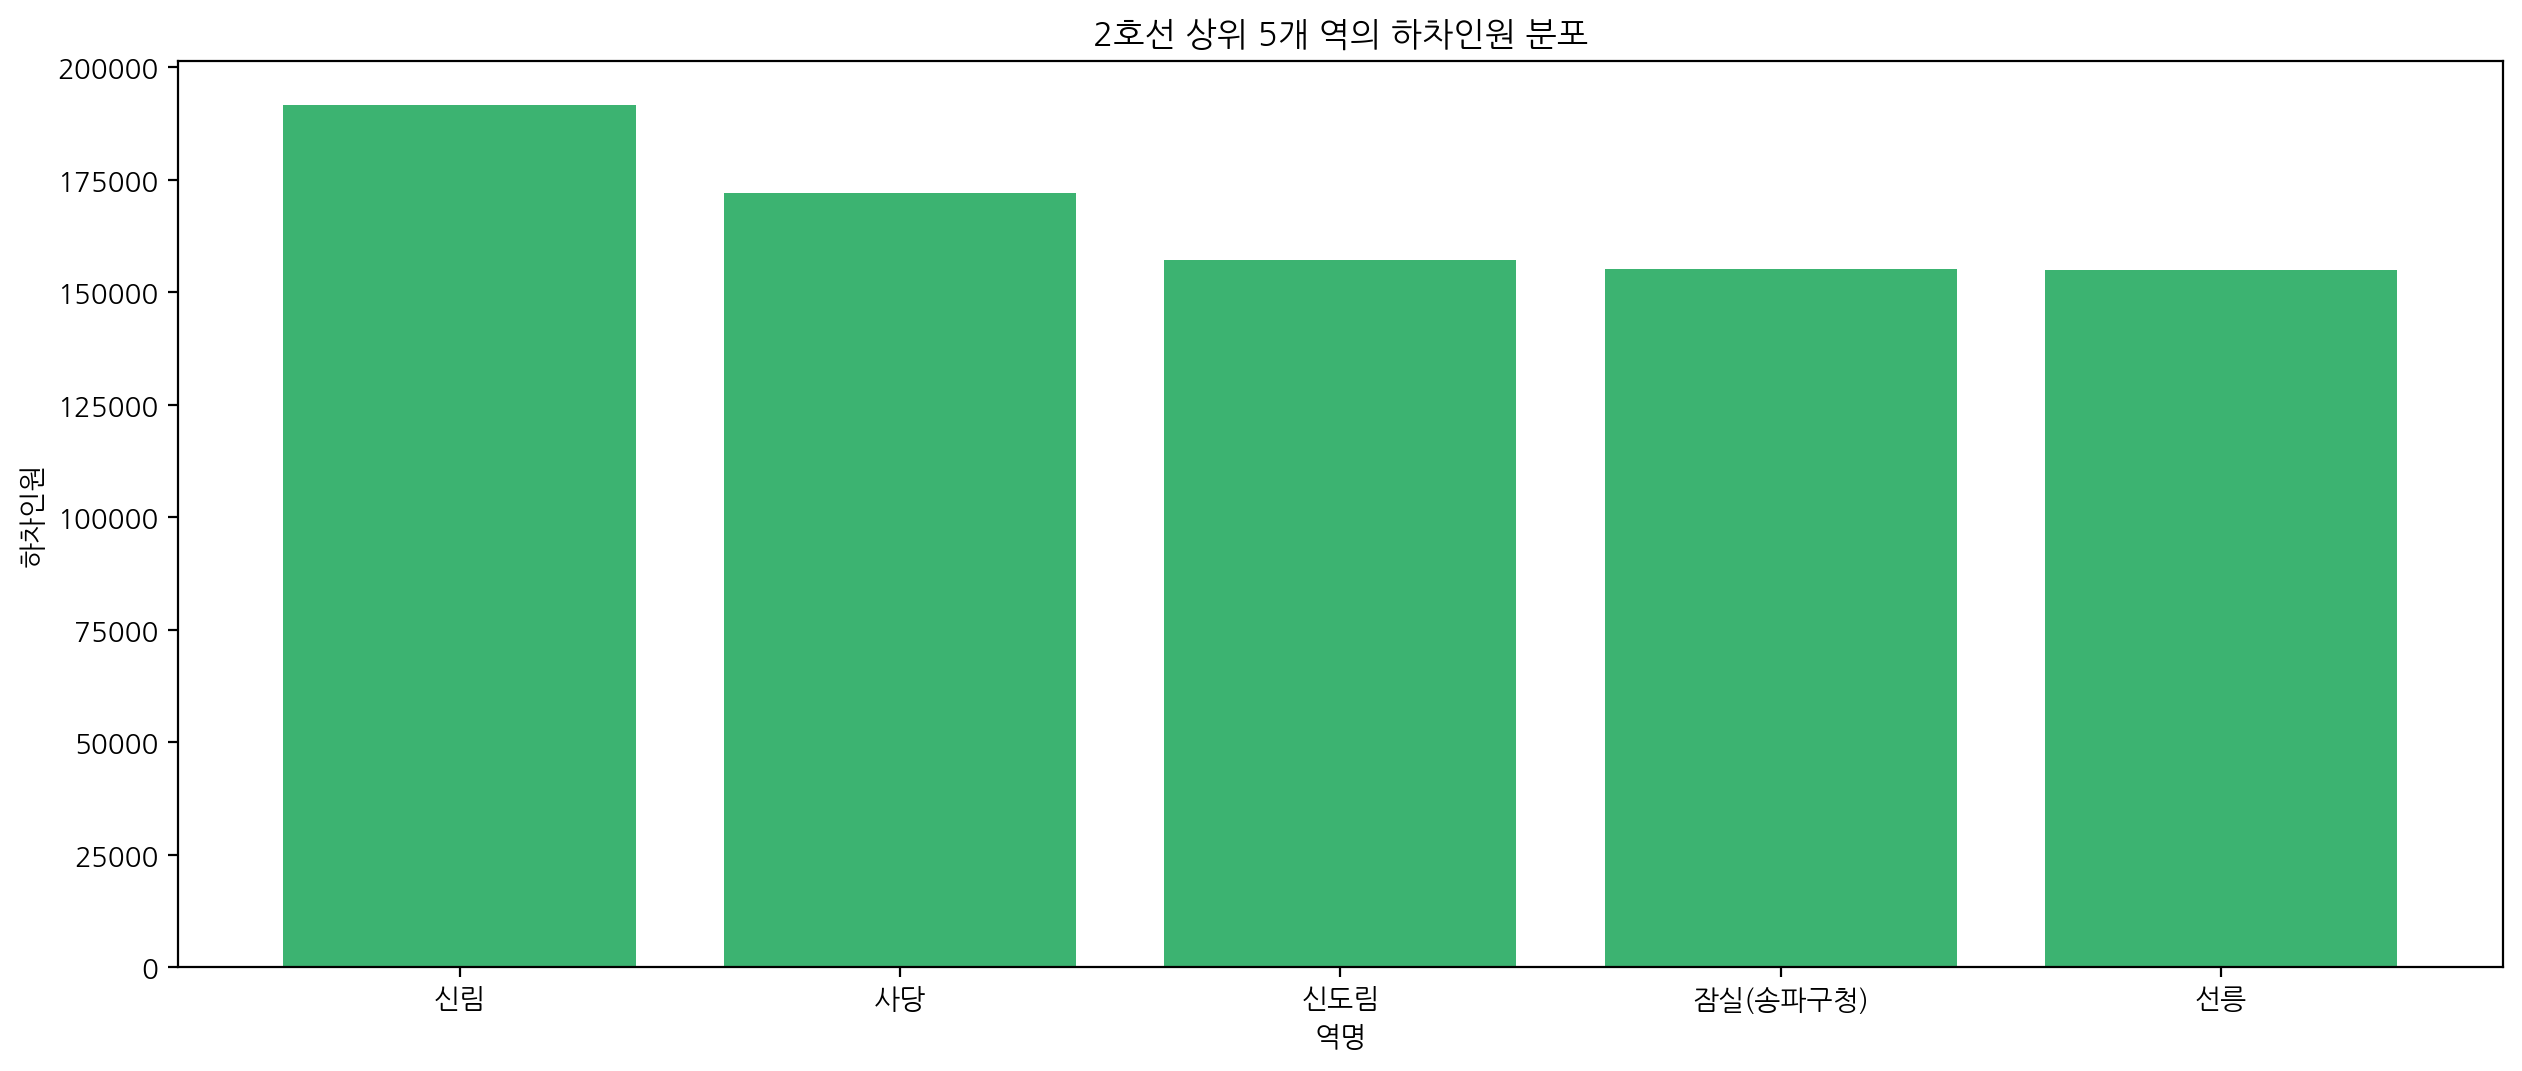

In [44]:
# 2호선 상위 5개 역 선정
top_5_stations = station_boarding2[station_boarding2['역명'].isin(['신림','사당','신도림','잠실(송파구청)','선릉'])]

# 역명 기준으로 내림차순 정렬
top_5_stations = top_5_stations.sort_values(by='승하차인원수', ascending=False)

# 상위 5개 역의 승차인원 분포 시각화
plt.figure(figsize=(15, 6), dpi=200)
plt.bar(top_5_stations['역명'], top_5_stations['승하차인원수'], color='mediumseagreen')
plt.xlabel('역명')
plt.ylabel('하차인원')
plt.title('2호선 상위 5개 역의 하차인원 분포')
plt.xticks(rotation=0)
plt.show()

5호선

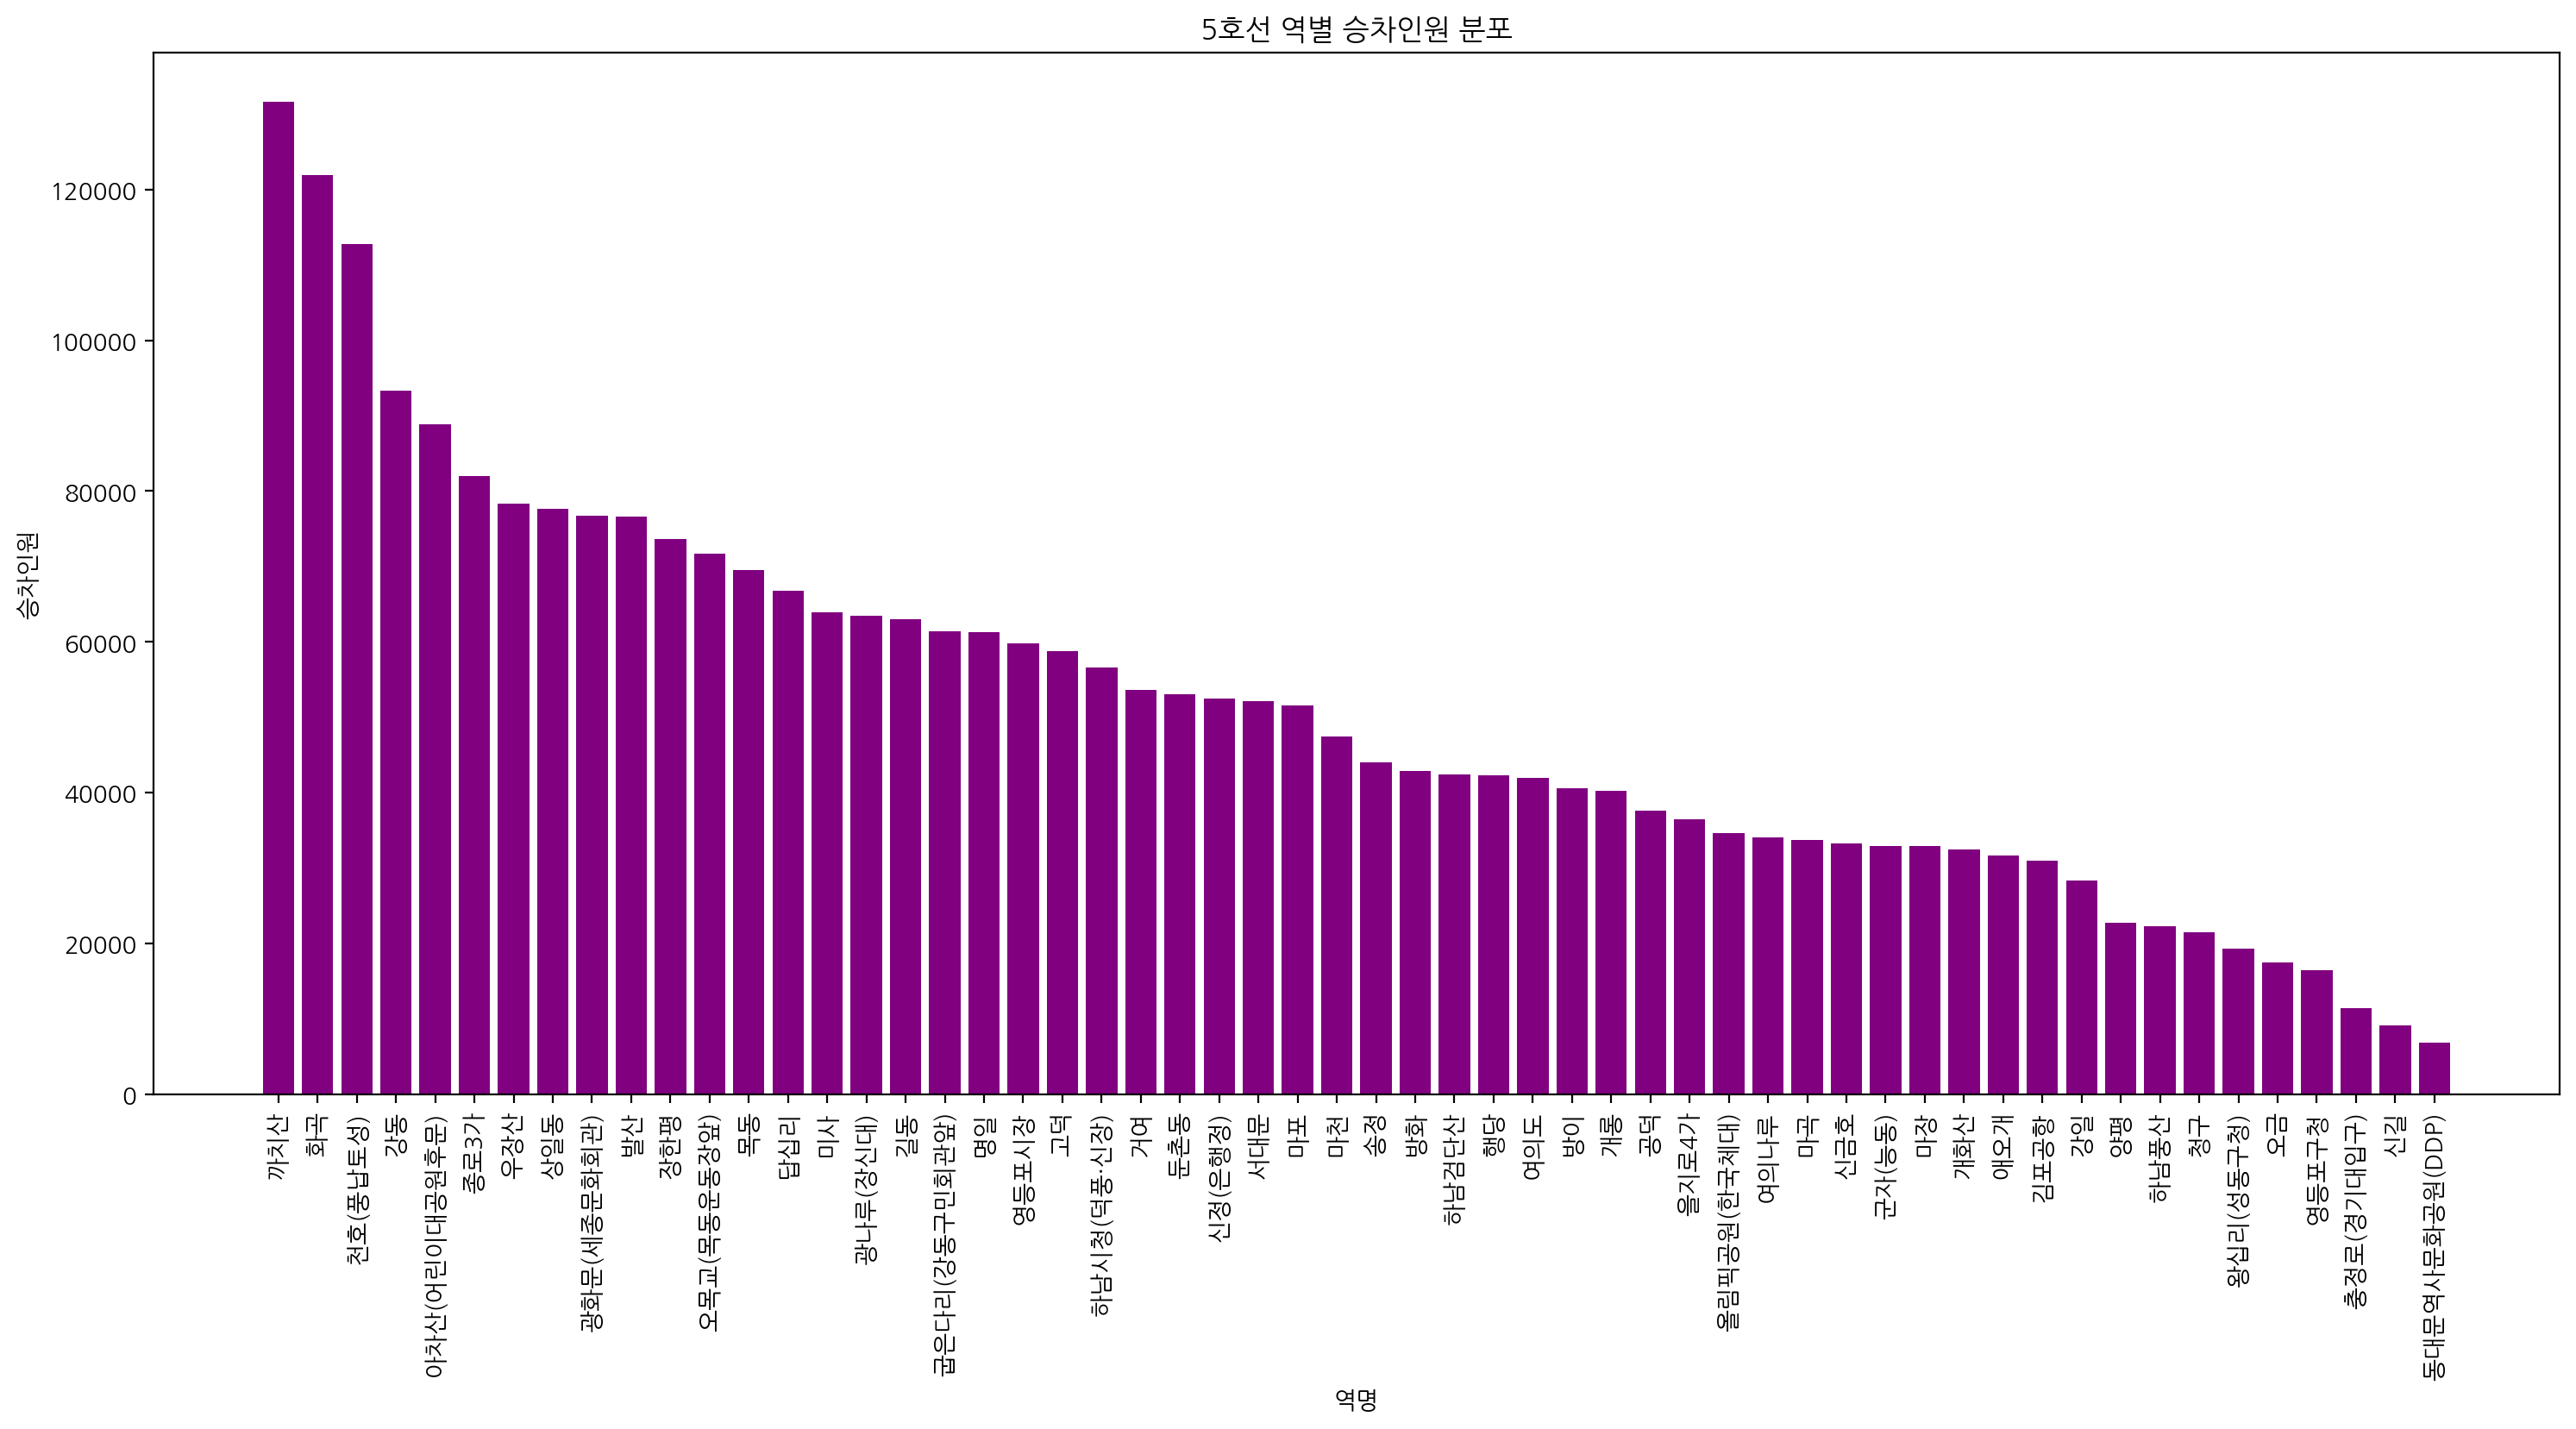

In [30]:
# 호선이 5이고 승하차구분이 '승차'인 데이터 추출
filtered_data = data[(data['호선'] == 5) & (data['승하차구분'] == '승차')]

# 역명과 승차인원 열 선택
station_boarding1 = filtered_data[['역명', '승하차인원수']]

# 승차인원수를 기준으로 내림차순 정렬
station_boarding1_sorted = station_boarding1.sort_values(by='승하차인원수', ascending=False)

# 역별 승차인원 분포 시각화
plt.figure(figsize=(18, 8), dpi=200)
plt.bar(station_boarding1_sorted['역명'], station_boarding1_sorted['승하차인원수'], color='purple')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('5호선 역별 승차인원 분포')
plt.xticks(rotation=90)
plt.show()

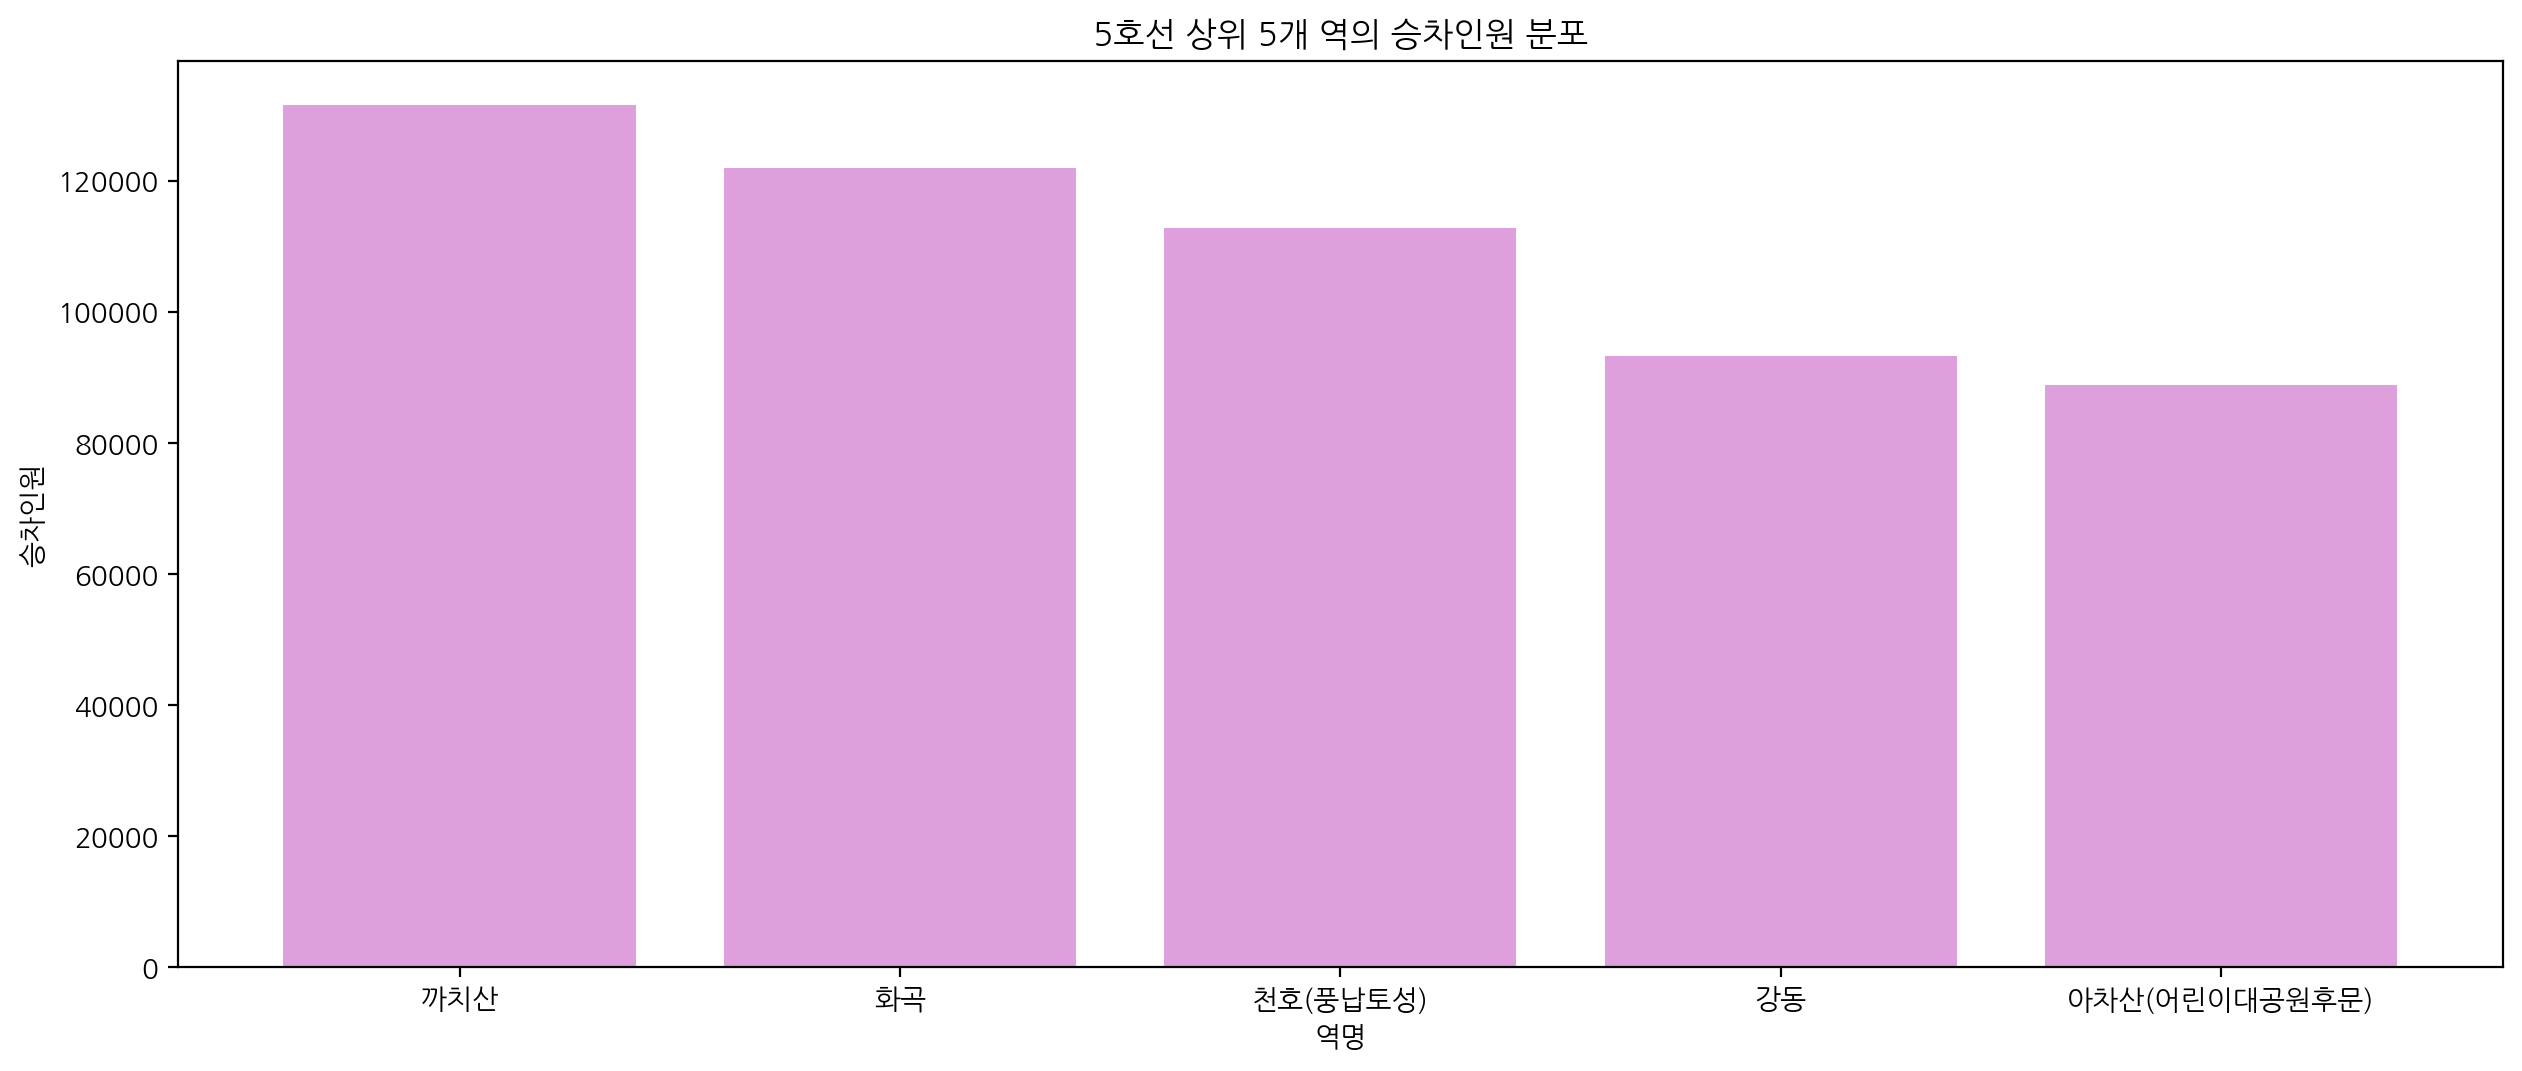

In [34]:
# 5호선 상위 5개 역 선정
top_5_stations = station_boarding1[station_boarding1['역명'].isin(['까치산','화곡','천호(풍납토성)','강동','아차산(어린이대공원후문)'])]

# 역명 기준으로 내림차순 정렬
top_5_stations = top_5_stations.sort_values(by='승하차인원수', ascending=False)

# 상위 5개 역의 승차인원 분포 시각화
plt.figure(figsize=(15, 6), dpi=200)
plt.bar(top_5_stations['역명'], top_5_stations['승하차인원수'], color='plum')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('5호선 상위 5개 역의 승차인원 분포')
plt.xticks(rotation=0)
plt.show()

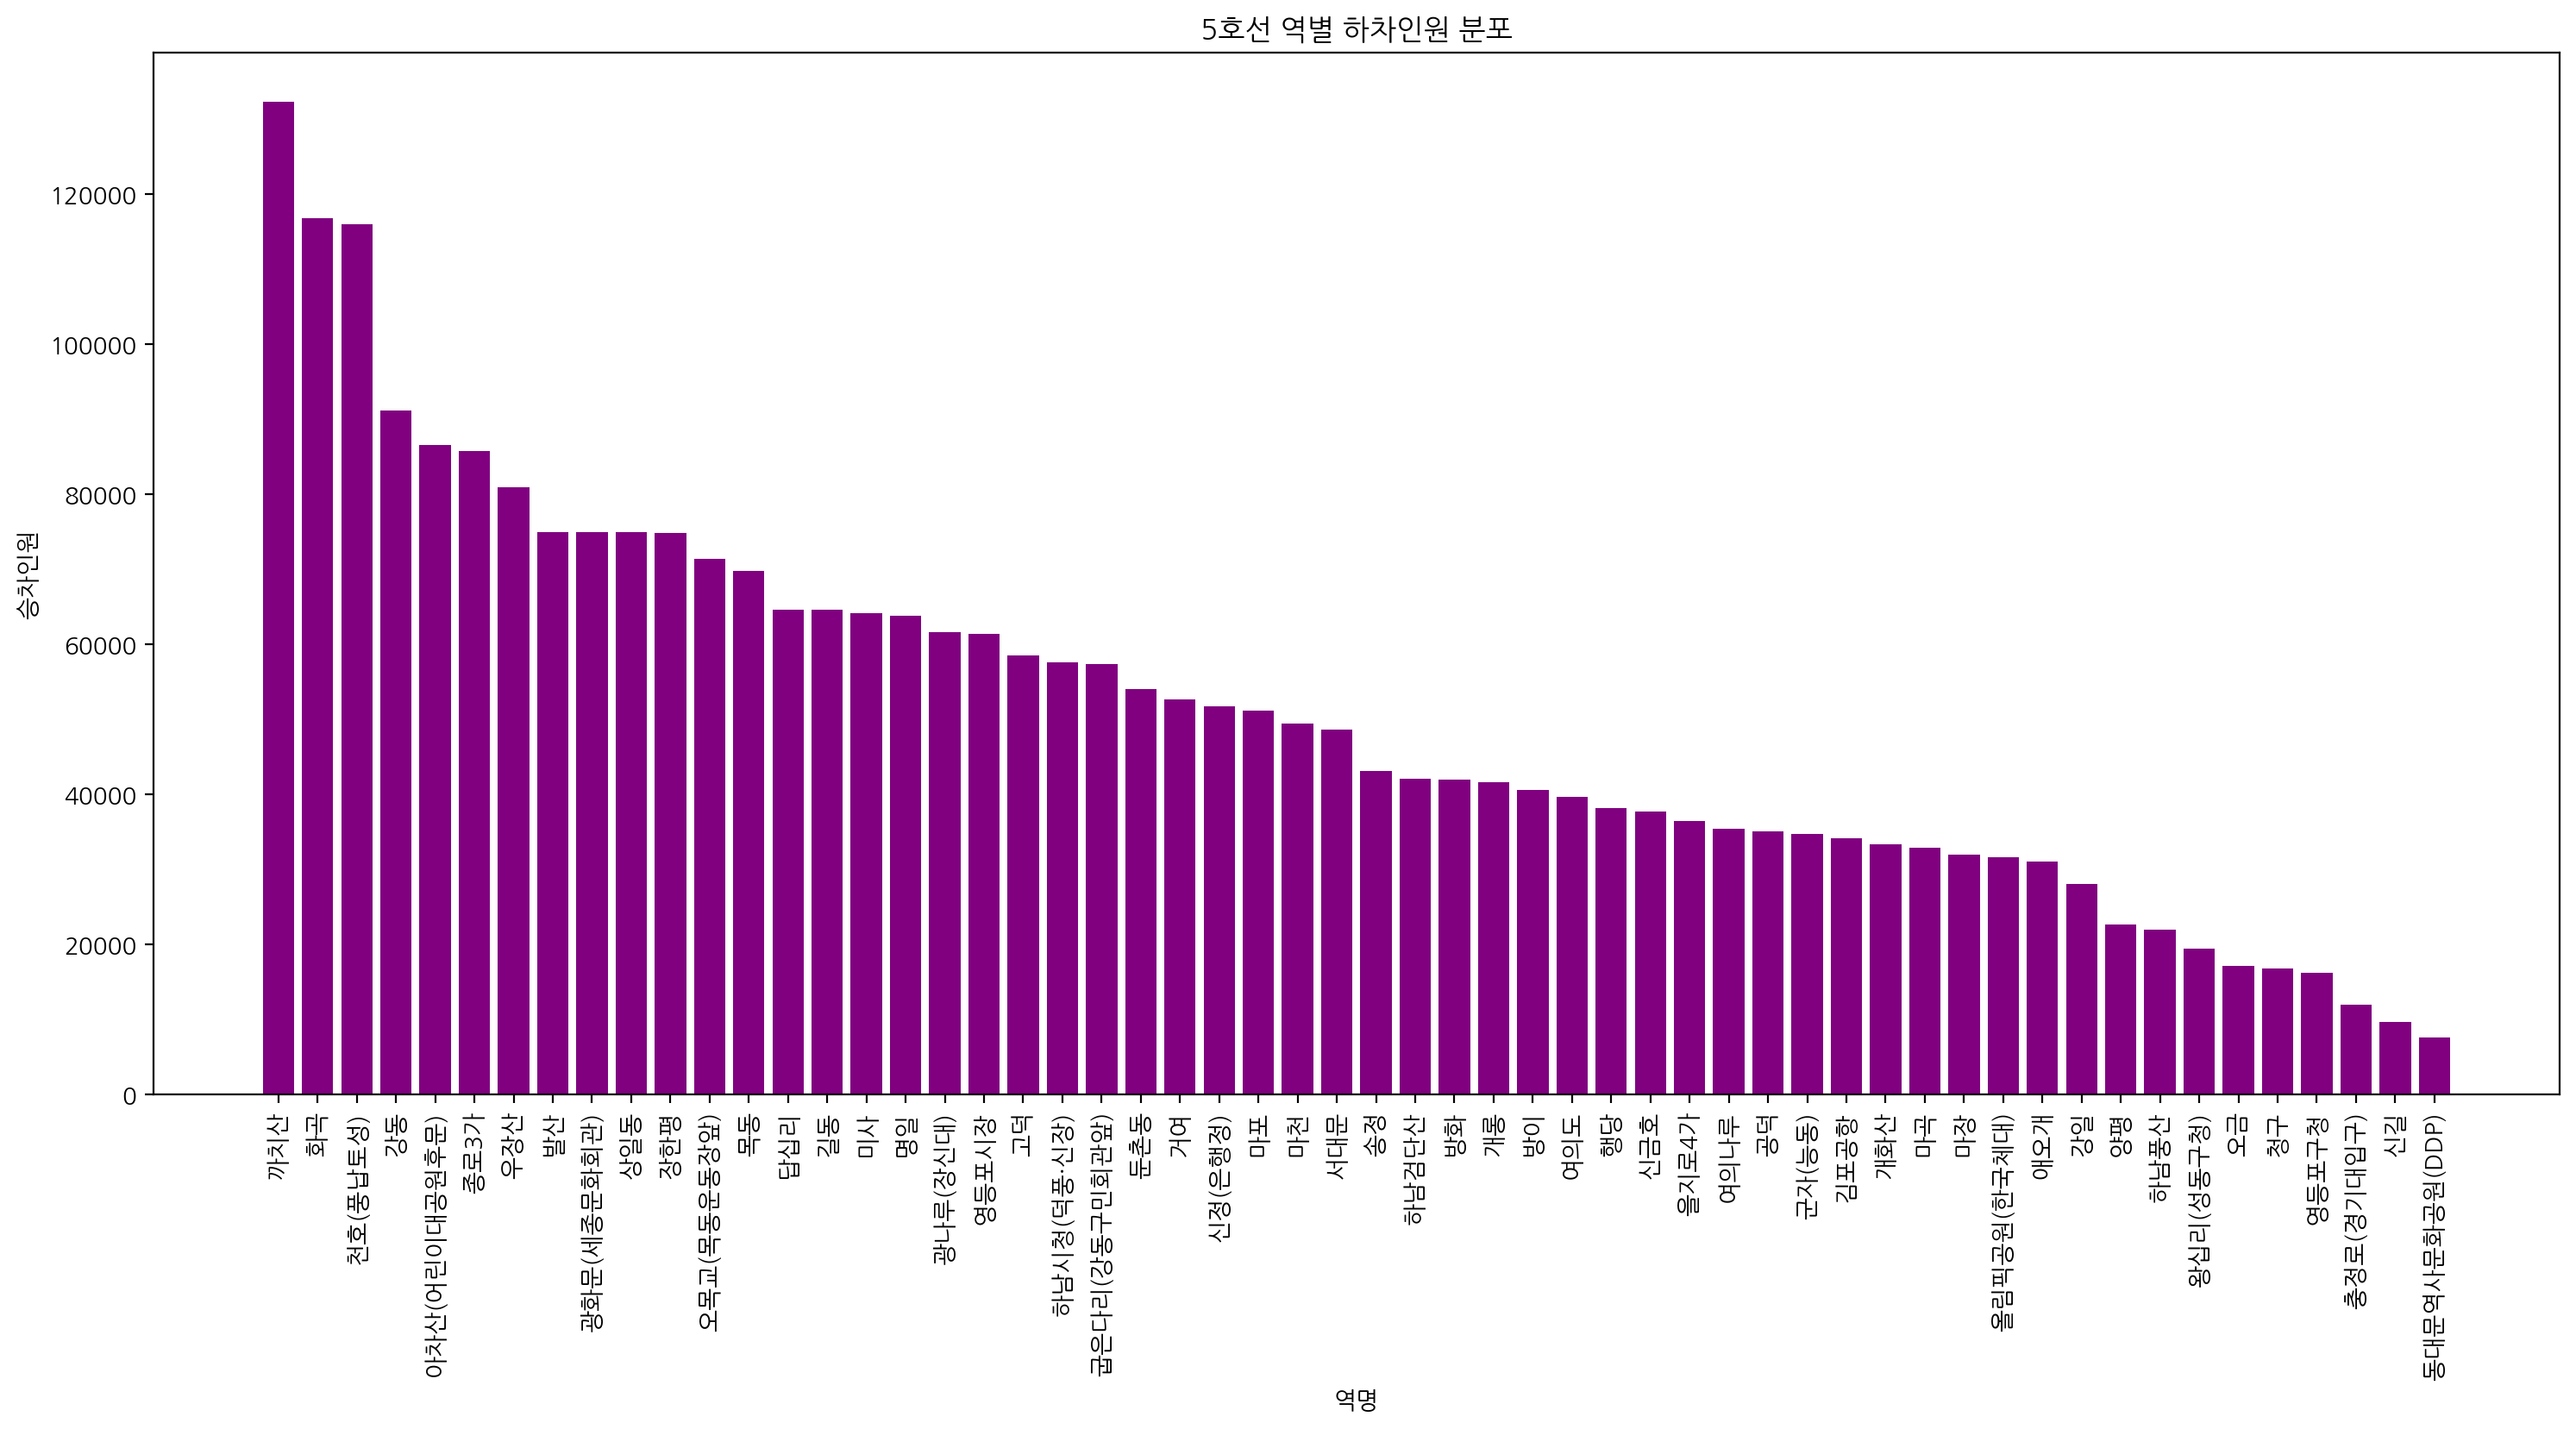

In [37]:
# 호선이 5이고 승하차구분이 '하차'인 데이터 추출
filtered_data = data[(data['호선'] == 5) & (data['승하차구분'] == '하차')]

# 역명과 승차인원 열 선택
station_boarding2 = filtered_data[['역명', '승하차인원수']]

# 승차인원수를 기준으로 내림차순 정렬
station_boarding2_sorted = station_boarding2.sort_values(by='승하차인원수', ascending=False)

# 역별 승차인원 분포 시각화
plt.figure(figsize=(18, 8), dpi=200)
plt.bar(station_boarding2_sorted['역명'], station_boarding2_sorted['승하차인원수'], color='purple')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('5호선 역별 하차인원 분포')
plt.xticks(rotation=90)
plt.show()

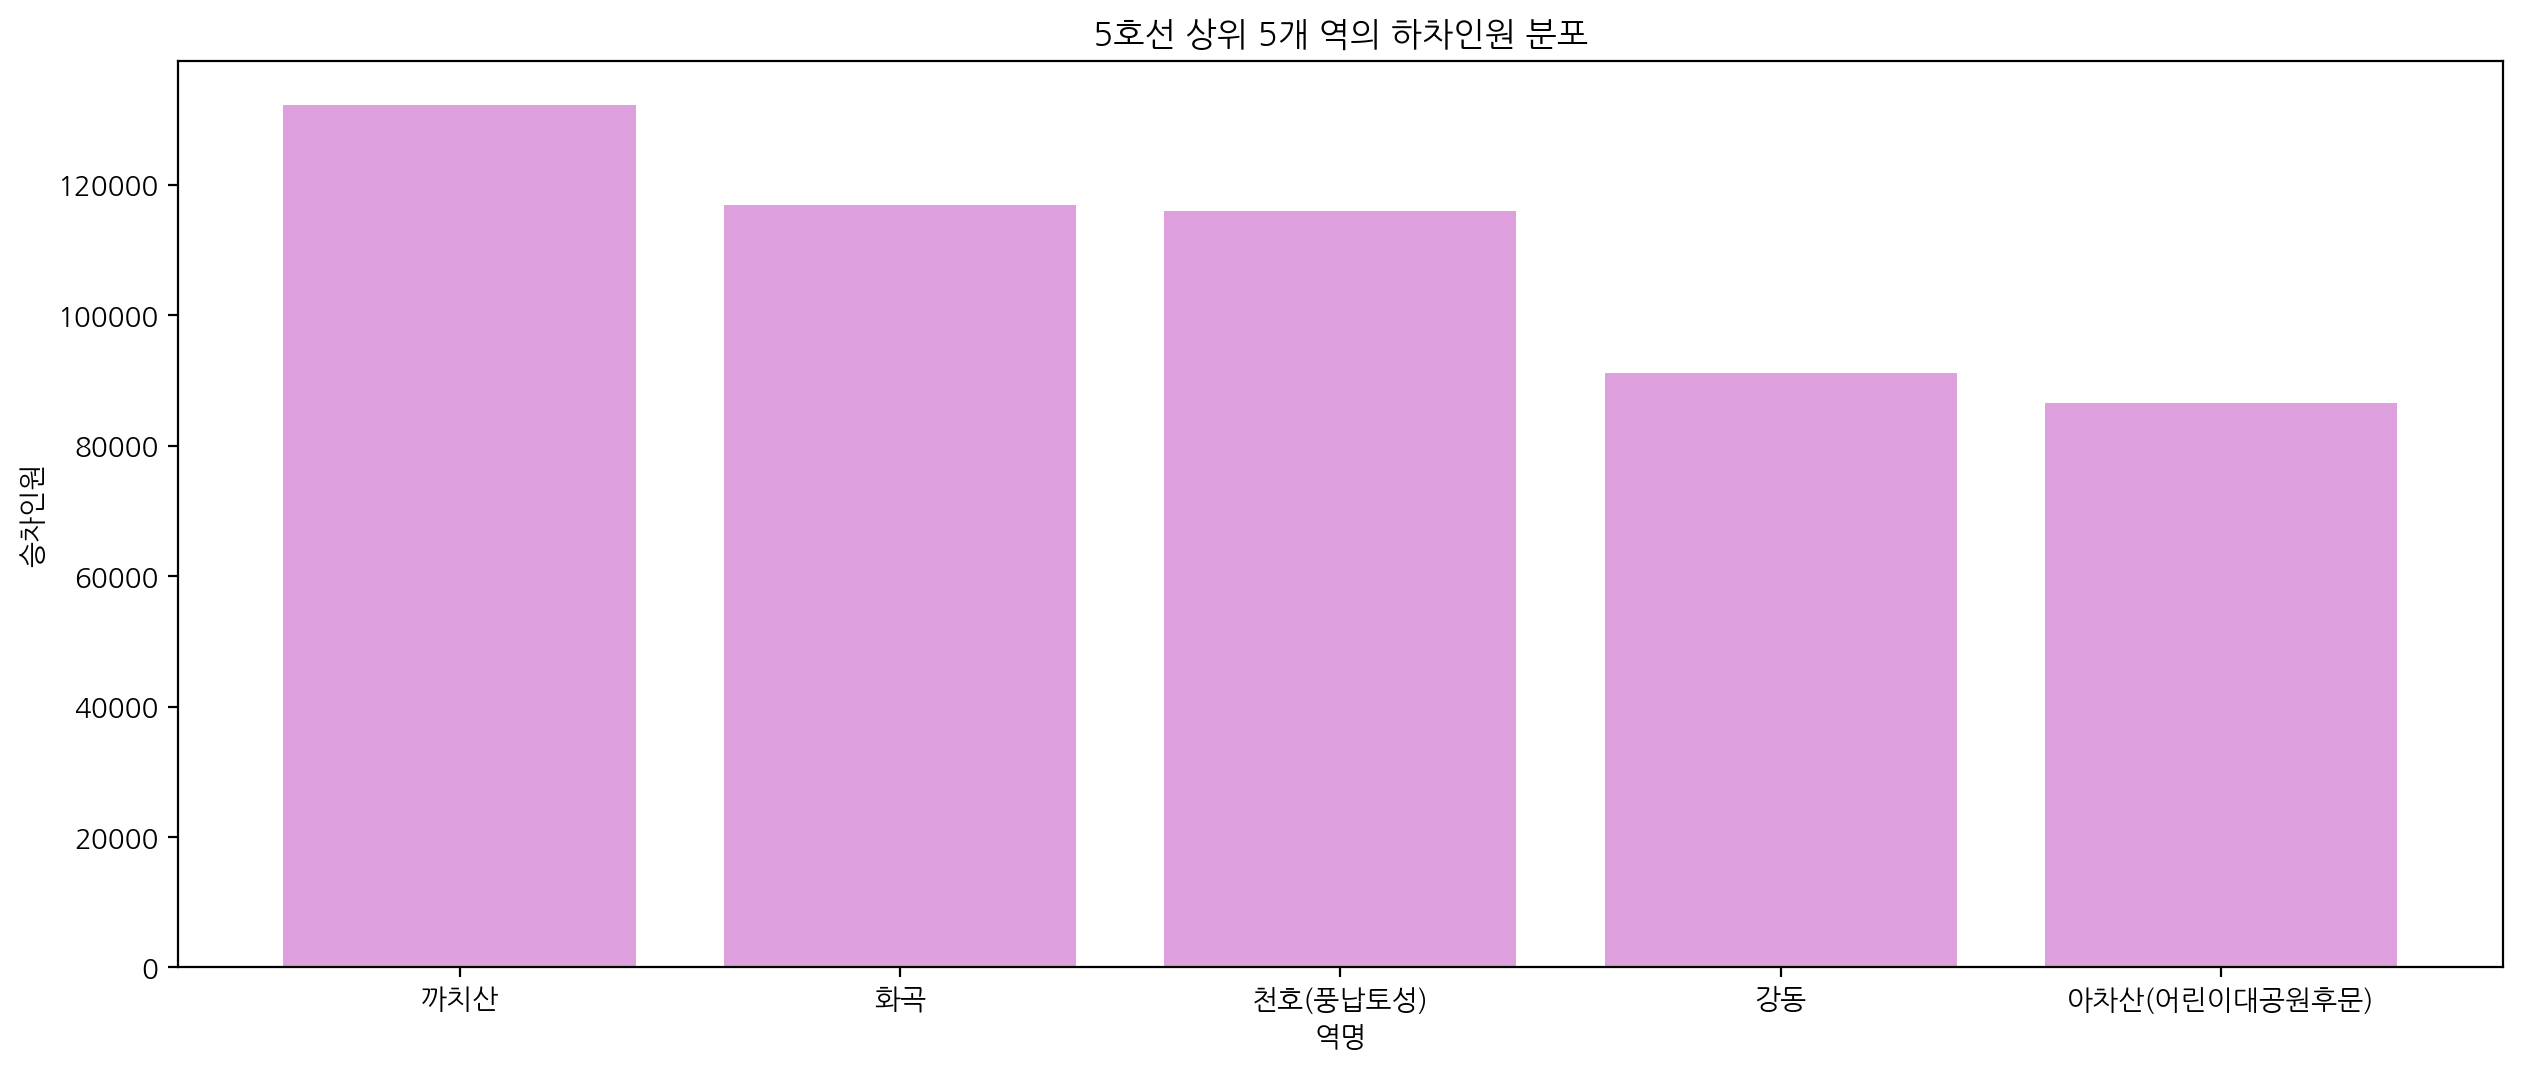

In [38]:
# 5호선 상위 5개 역 선정
top_5_stations = station_boarding2[station_boarding2['역명'].isin(['까치산','화곡','천호(풍납토성)','강동','아차산(어린이대공원후문)'])]

# 역명 기준으로 내림차순 정렬
top_5_stations = top_5_stations.sort_values(by='승하차인원수', ascending=False)

# 상위 5개 역의 승차인원 분포 시각화
plt.figure(figsize=(15, 6), dpi=200)
plt.bar(top_5_stations['역명'], top_5_stations['승하차인원수'], color='plum')
plt.xlabel('역명')
plt.ylabel('승차인원')
plt.title('5호선 상위 5개 역의 하차인원 분포')
plt.xticks(rotation=0)
plt.show()

### 3) 호선별 승하차 총인원
아래에서는 1호선과 6호선 진행

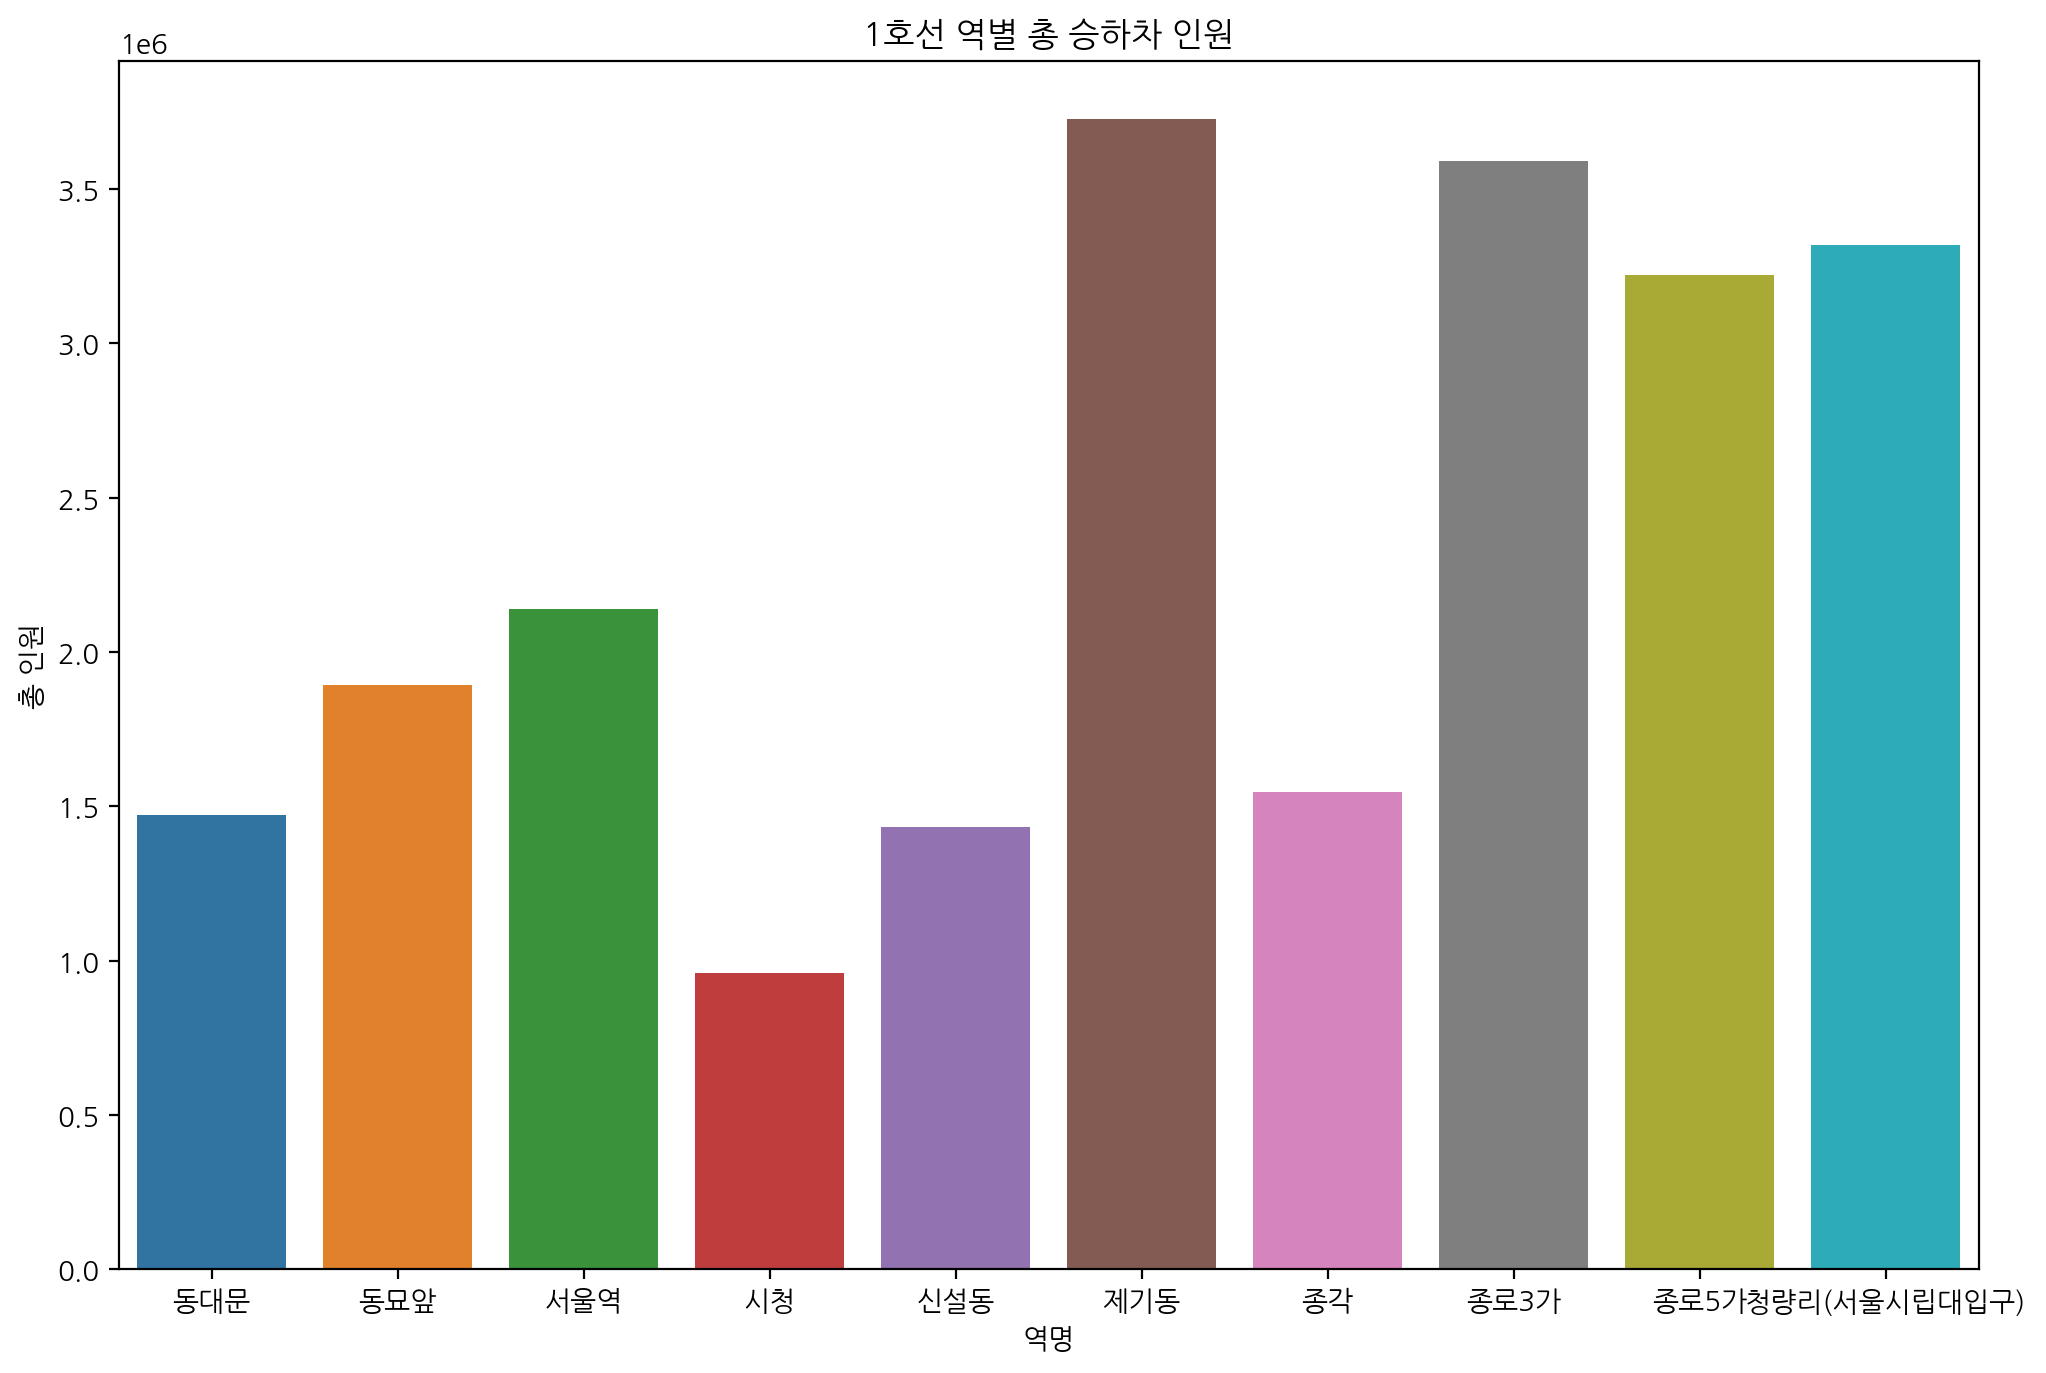

In [21]:
# 1호선 데이터 추출
line_1_data = data[data['호선'] == 1]

# 역별 승하차 총 인원 계산
station_total_passengers = line_1_data.groupby('역명')['승하차인원수'].sum().reset_index()

plt.figure(figsize=(12, 8), dpi=200)  # 그래프 크기 조정
sns.barplot(x='역명', y='승하차인원수', data=station_total_passengers)

plt.xlabel('역명')
plt.ylabel('총 인원')
plt.title('1호선 역별 총 승하차 인원')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.show()

- 1호선의 승하차 총 인원 분포 확인시, 제기동역과 종로3가의 분포가 높은 것을 확인할 수 있습니다.

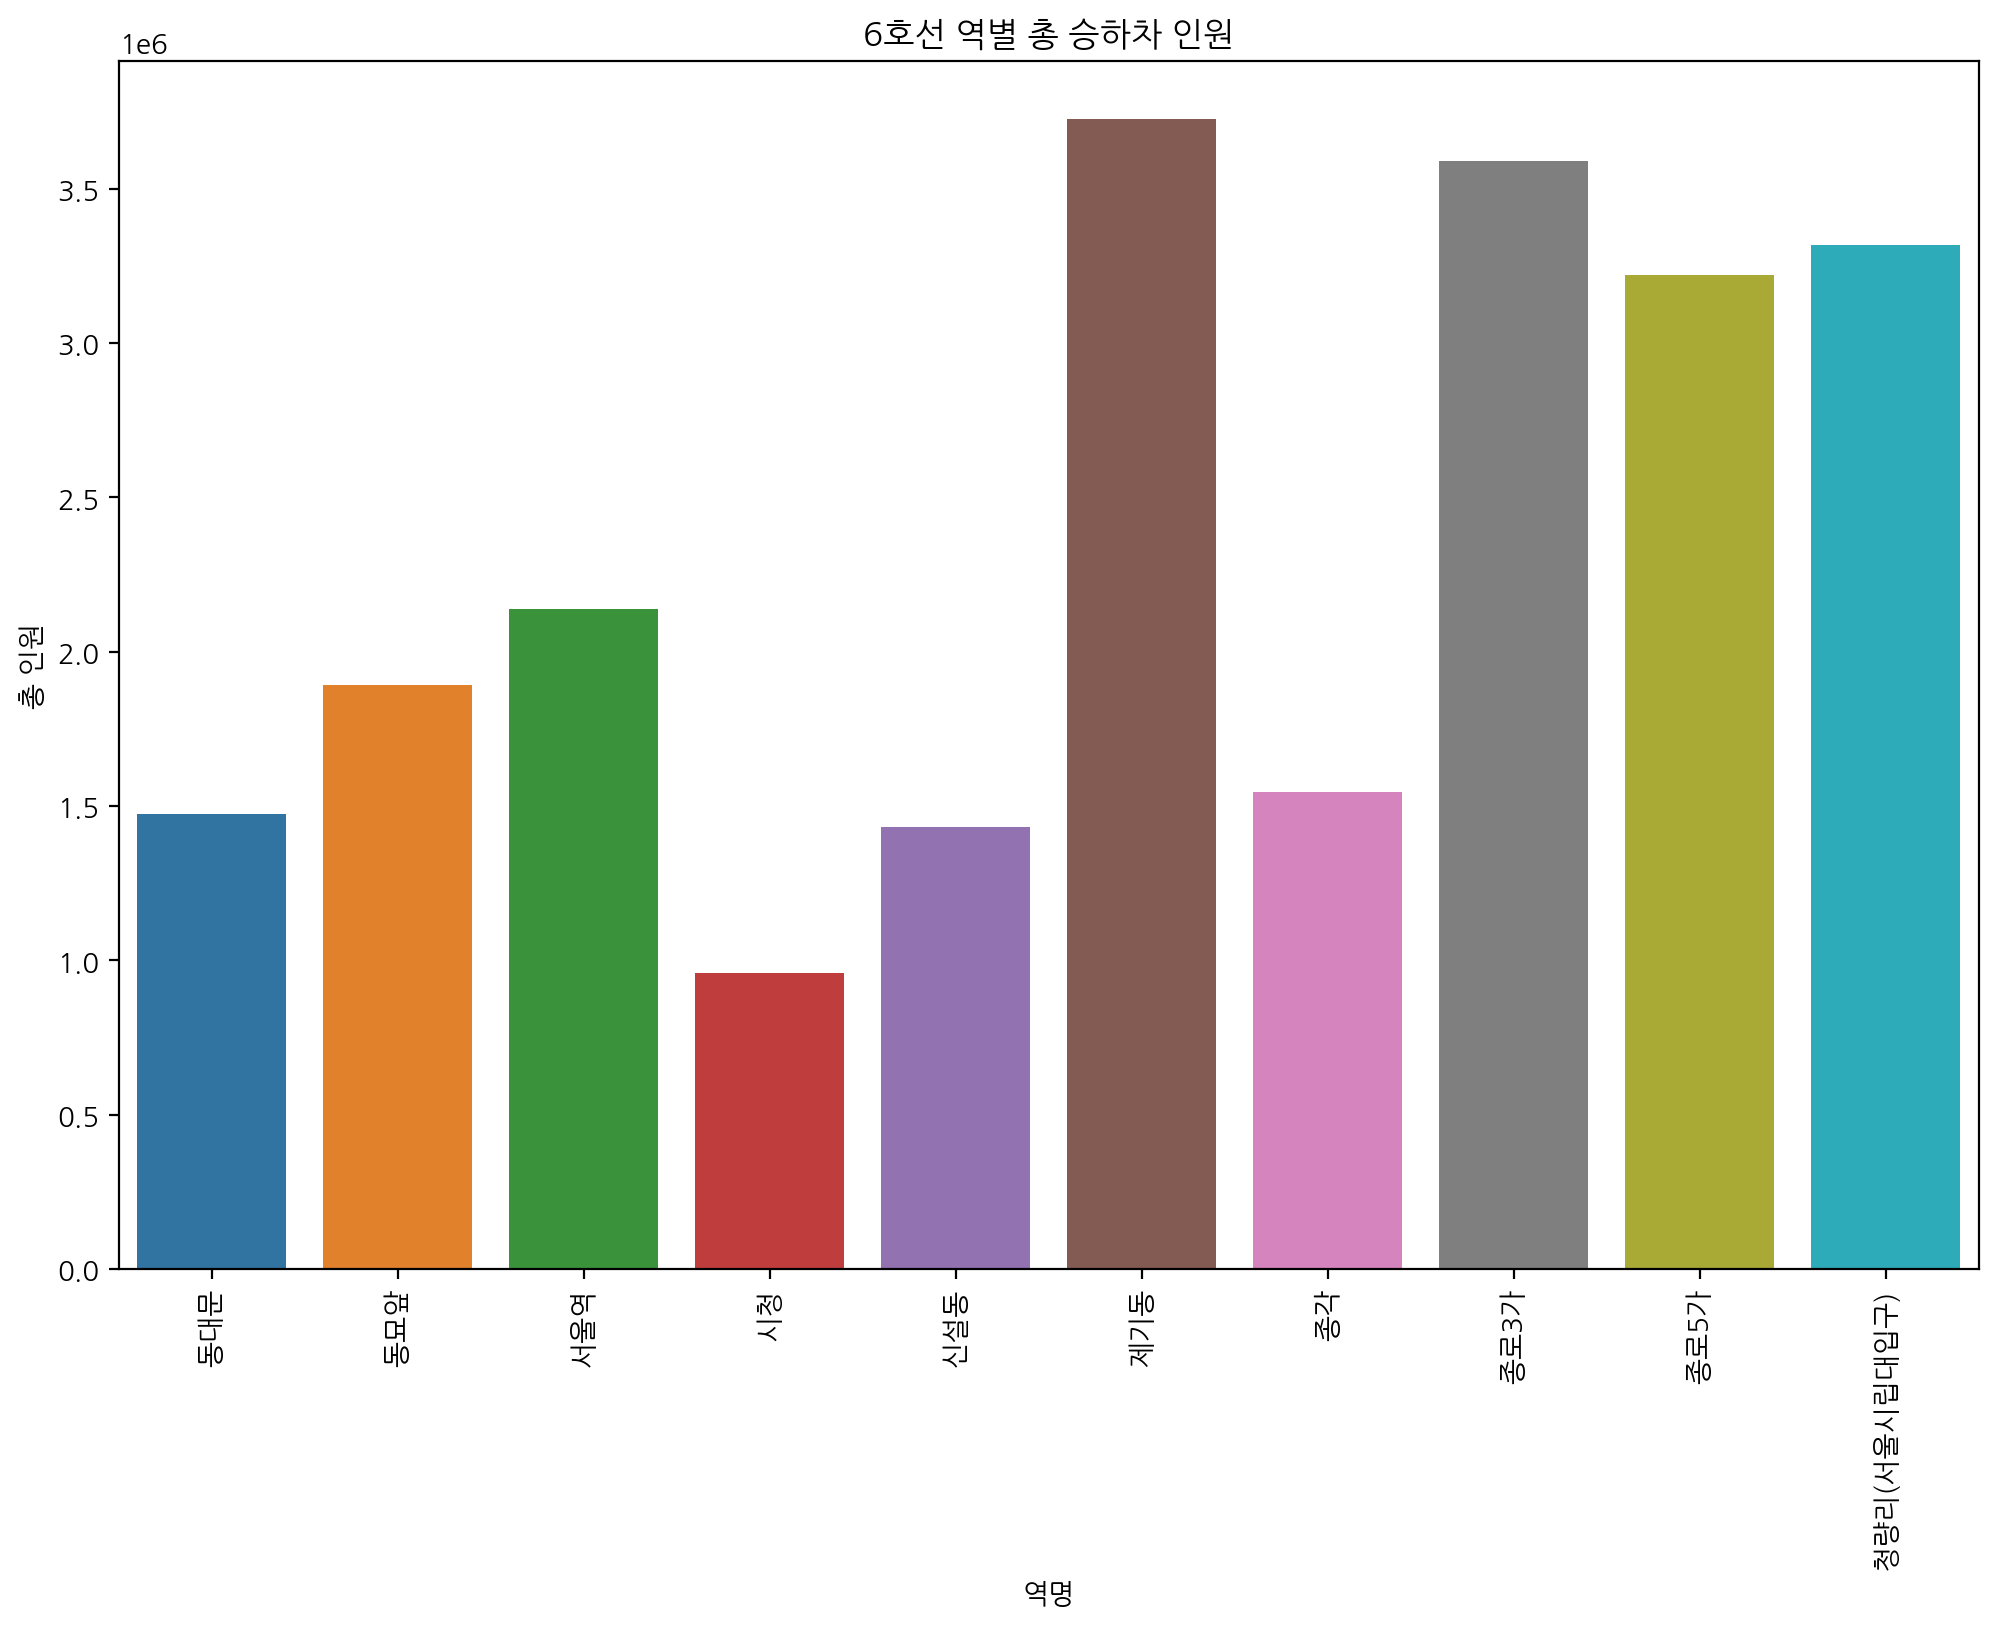

In [22]:
# 6호선 데이터 추출
line_6_data = data[data['호선'] == 6]

# 역별 승하차 총 인원 계산
station_total_passengers = line_1_data.groupby('역명')['승하차인원수'].sum().reset_index()

plt.figure(figsize=(12, 8), dpi=200)  # 그래프 크기 조정
sns.barplot(x='역명', y='승하차인원수', data=station_total_passengers)

plt.xlabel('역명')
plt.ylabel('총 인원')
plt.title('6호선 역별 총 승하차 인원')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

- 응암역의 승하차 총인원이 높은 것을 확인할 수 있습니다
- 응암순환행 6호선 열차가 많아 그런가..? 이런 거도 유추할 수 있을듯

### 4) 추가 응용 : 사용자가 원하는 호선 입력하면 해당 호선 총인원 분포 시각화 보여준다

원하시는 호선의 총 승하차 인원 분포를 보여드리겠습니다. 1~8 사이의 자연수를 입력해주세요: 6


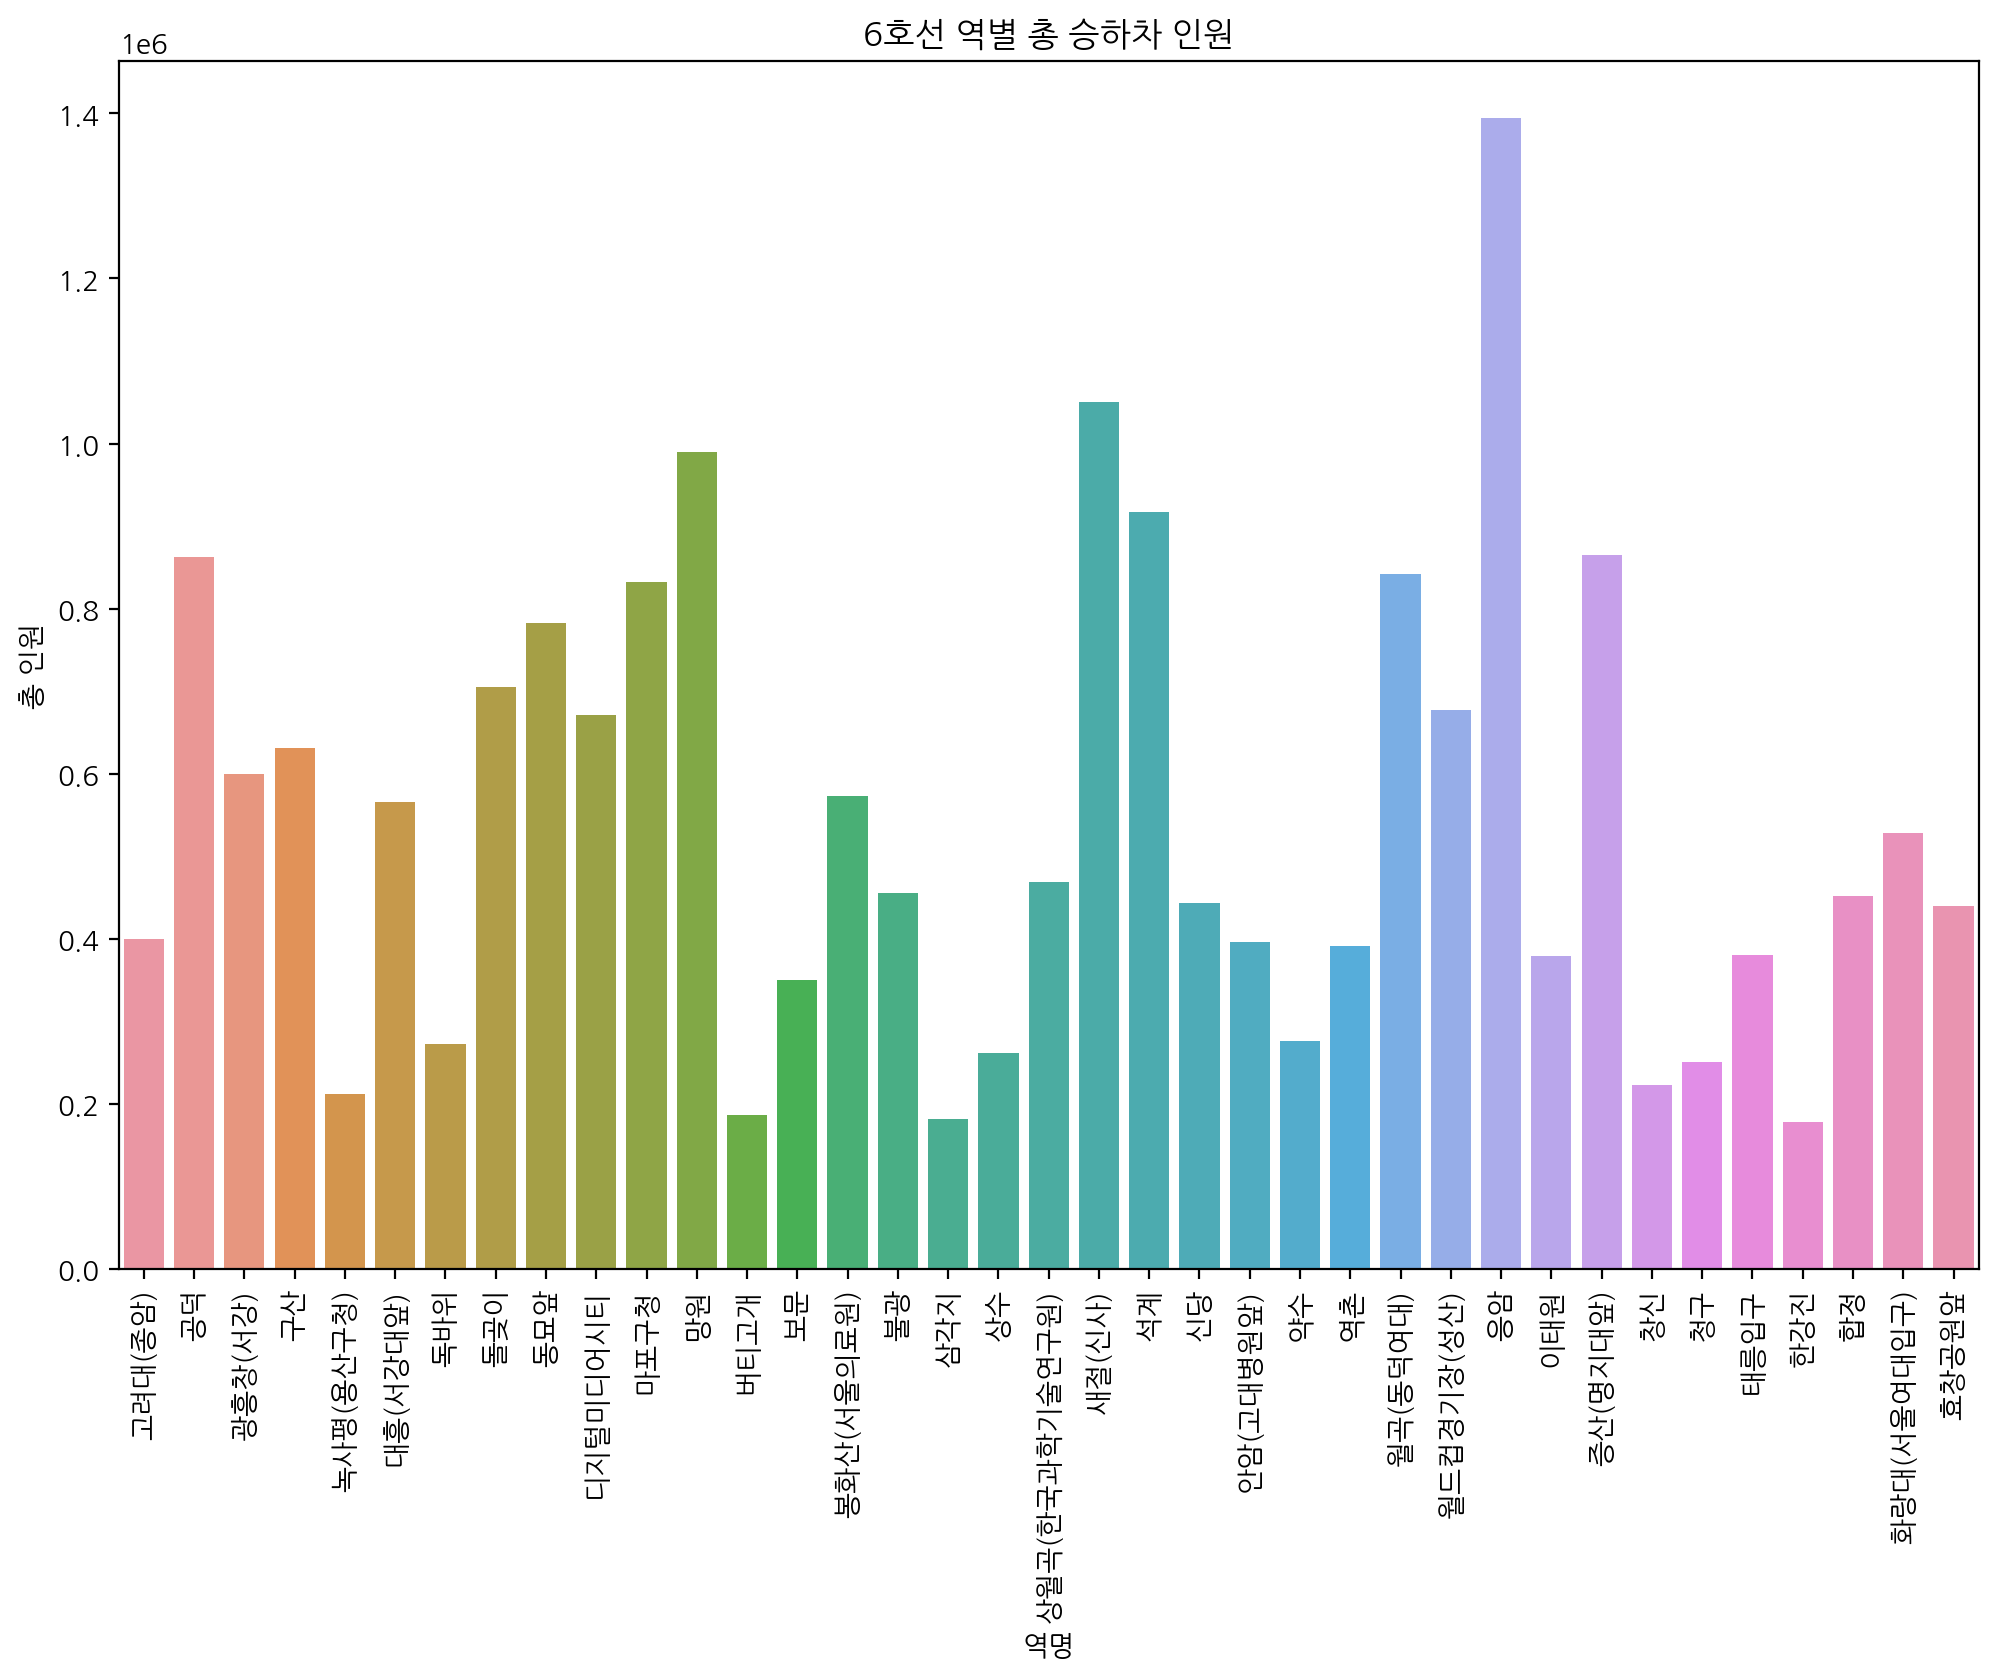

In [23]:
try:
    n = int(input("원하시는 호선의 총 승하차 인원 분포를 보여드리겠습니다. 1~8 사이의 자연수를 입력해주세요: "))
    if n < 1 or n > 8:
        raise ValueError("입력한 호선 번호가 범위를 벗어났습니다.")
    
    # n호선 데이터 추출
    line_n_data = data[data['호선'] == n]

    # 역별 승하차 총 인원 계산
    station_total_passengers = line_n_data.groupby('역명')['승하차인원수'].sum().reset_index()

    plt.figure(figsize=(12, 8), dpi=200)  # 그래프 크기 조정
    sns.barplot(x='역명', y='승하차인원수', data=station_total_passengers)

    plt.xlabel('역명')
    plt.ylabel('총 인원')
    plt.title(str(n) + '호선 역별 총 승하차 인원')
    plt.xticks(rotation=90)  # x축 레이블 회전
    plt.show()

except ValueError as e:
    print(str(e))


### 사용자가 역명 입력하면 해당 역 승하차 분포 시각화 출력

아래는 동대문역 진행, 동대문역은 1호선이자 4호선이기에 두 그래프가 나타난다

원하시는 역의 승하차 총 인원 분포를 보여드리겠습니다. 역명을 입력해주세요: 동대문


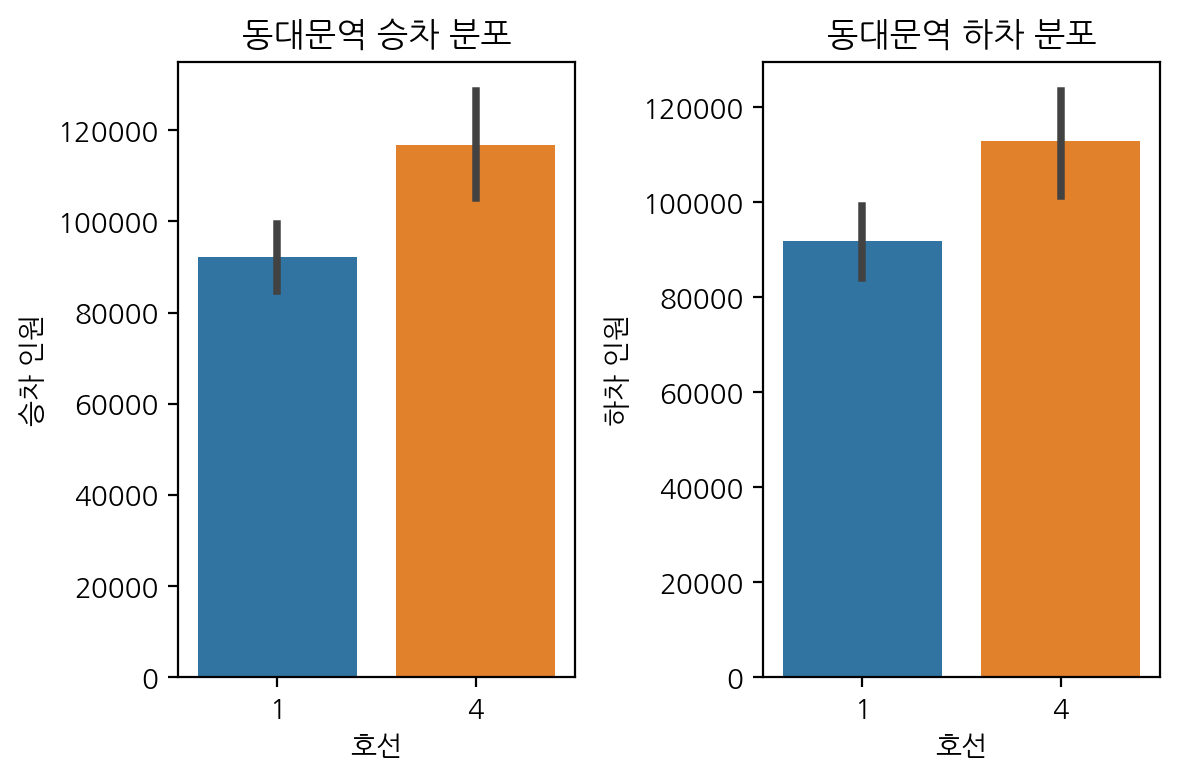

In [62]:
station = input("원하시는 역의 승하차 총 인원 분포를 보여드리겠습니다. 역명을 입력해주세요: ")
if station not in data['역명'].unique():
    print("올바른 역명을 입력해주세요.")
    exit()

# 입력된 역명에 대한 승차 및 하차 분포 데이터 추출
station_data = data[data['역명'] == station]

plt.figure(dpi=200)

# 왼쪽 서브플롯 - 승차 분포
plt.subplot(121)
sns.barplot(x='호선', y='승하차인원수', data=station_data[station_data['승하차구분'] == '승차'])
plt.xlabel('호선')
plt.ylabel('승차 인원')
plt.title(station + '역 승차 분포')

# 오른쪽 서브플롯 - 하차 분포
plt.subplot(122)
sns.barplot(x='호선', y='승하차인원수', data=station_data[station_data['승하차구분'] == '하차'])
plt.xlabel('호선')
plt.ylabel('하차 인원')
plt.title(station + '역 하차 분포')

plt.tight_layout()  # 그래프 간격 조정
plt.show()


### 5) 여러 시각화 나타내기

1호선 승차 분포(왼), 하차 분포(오)

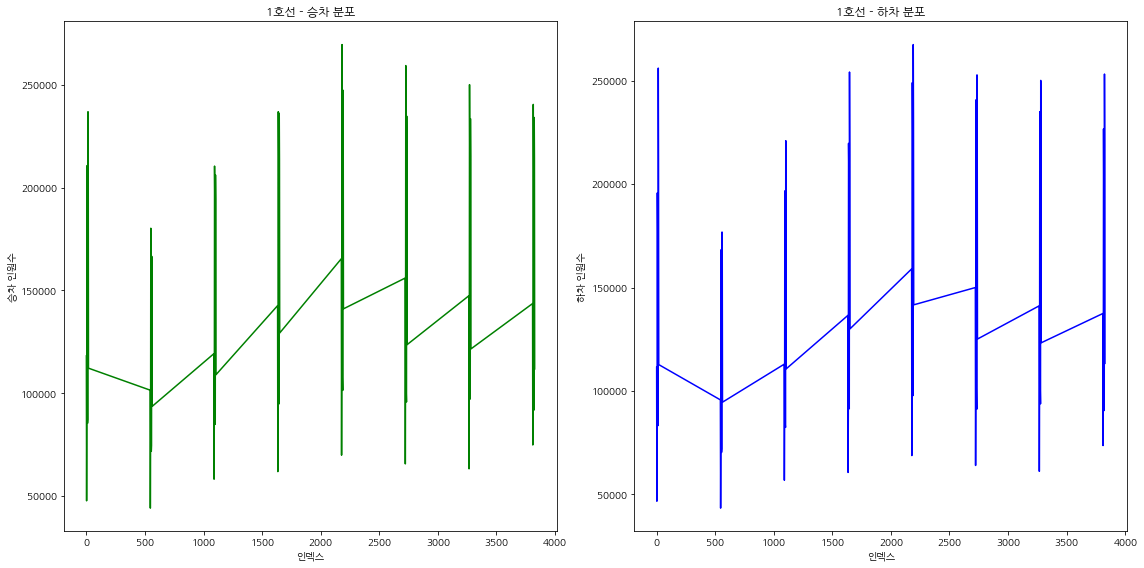

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))


# 왼쪽 서브플롯 - 승차 분포
ax[0].plot(data[(data['호선'] == 1) & (data['승하차구분'] == '승차')]['승하차인원수'], color='green')
ax[0].set_xlabel('인덱스')
ax[0].set_ylabel('승차 인원수')
ax[0].set_title('1호선 - 승차 분포')

# 오른쪽 서브플롯 - 하차 분포
ax[1].plot(data[(data['호선'] == 1) & (data['승하차구분'] == '하차')]['승하차인원수'], color='blue')
ax[1].set_xlabel('인덱스')
ax[1].set_ylabel('하차 인원수')
ax[1].set_title('1호선 - 하차 분포')

plt.tight_layout()  # 그래프 간격 조정
plt.show()

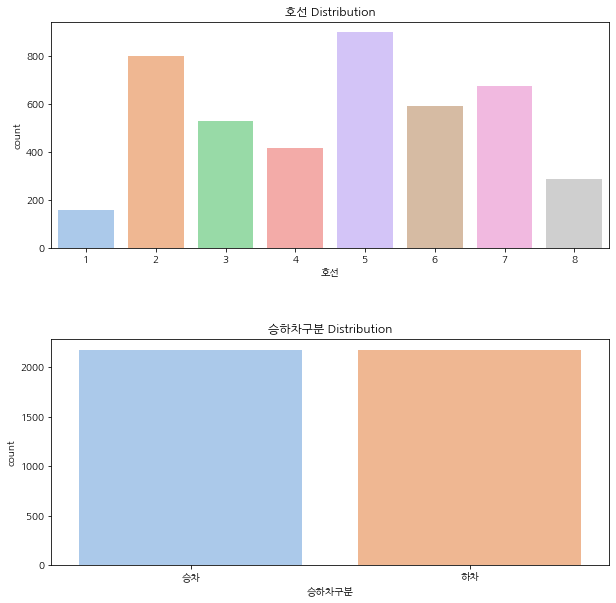

In [65]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2,1) #그래프 4가지
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.4) # 여러 그래프가 그려질 것이니 서로 충돌하지 않게 간격 조절

data_features = ['호선', '승하차구분']

for idx, feature in enumerate(data_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data= data,
                 palette = 'pastel' , #색상조절하기
                  ax = ax) 
    ax.set_title(f'{feature} Distribution')

hist

array([[<AxesSubplot:title={'center':'호선'}>,
        <AxesSubplot:title={'center':'고유역번호(외부역코드)'}>],
       [<AxesSubplot:title={'center':'승하차인원수'}>, <AxesSubplot:>]],
      dtype=object)

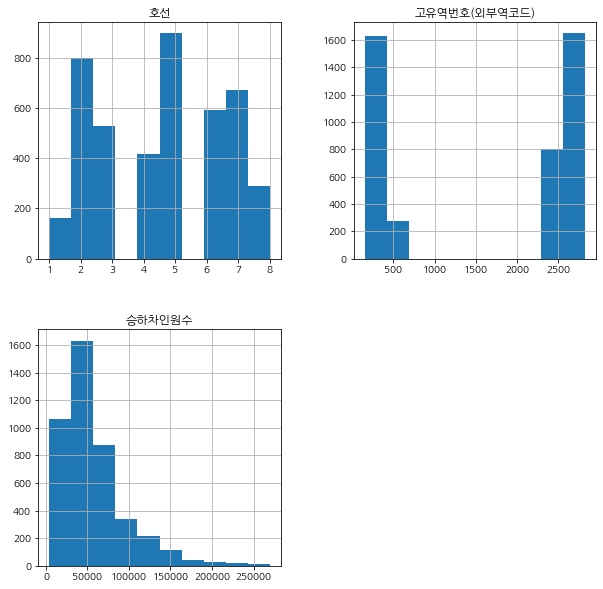

In [90]:
data.hist(figsize=(10,10))

missing 값이나 null 값 찾아보기